In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [3]:
df=pd.read_csv(r"D:\Swiggy_Time_prediction\Data\swiggy_demo.csv")
df.head()

,Unnamed: 0,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138


In [42]:
df.columns

Index(['Unnamed: 0', 'rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='str')

In [43]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [44]:
df.isnull().sum()/len(df)*100

rider_id                0.0
age                     0.0
ratings                 0.0
restaurant_latitude     0.0
restaurant_longitude    0.0
delivery_latitude       0.0
delivery_longitude      0.0
order_date              0.0
weather                 0.0
traffic                 0.0
vehicle_condition       0.0
type_of_order           0.0
type_of_vehicle         0.0
multiple_deliveries     0.0
festival                0.0
city_type               0.0
time_taken              0.0
city_name               0.0
order_day               0.0
order_month             0.0
order_day_of_week       0.0
is_weekend              0.0
pickup_time_minutes     0.0
order_time_hour         0.0
order_time_of_day       0.0
distance                0.0
dtype: float64

# Exploratory data Analysis

# Univariate Analysis

Numerical feature

Summary statistics for: age

count    45502.000000
mean        29.555008
std          5.642882
min         20.000000
25%         25.000000
50%         29.555008
75%         34.000000
max         39.000000
Name: age, dtype: float64

Skewness   : -0.015
Kurtosis   : -1.132


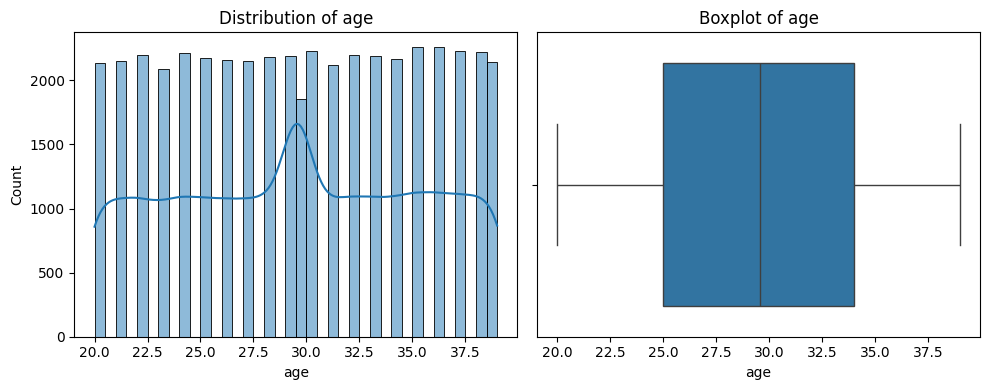

Summary statistics for: ratings

count    45502.000000
mean         4.638001
std          0.307450
min          2.500000
25%          4.600000
50%          4.700000
75%          4.800000
max          5.000000
Name: ratings, dtype: float64

Skewness   : -1.853
Kurtosis   : 5.529


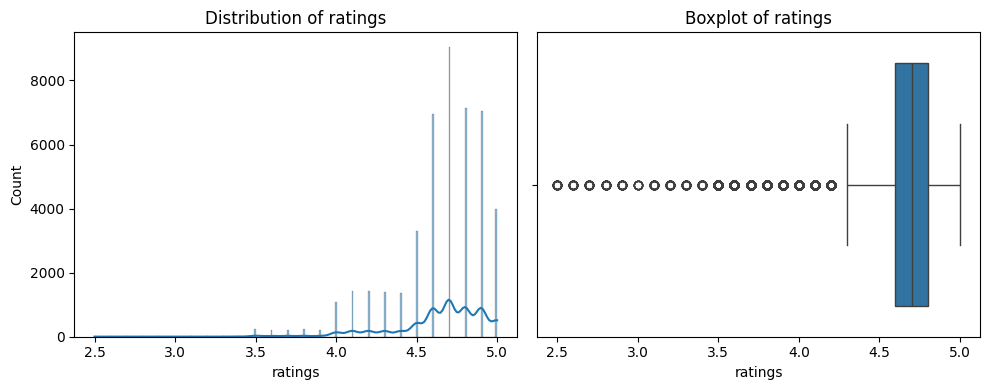

Summary statistics for: restaurant_latitude

count    45502.000000
mean        18.913696
std          5.244648
min          9.957144
25%         13.029198
50%         18.913696
75%         22.732225
max         30.914057
Name: restaurant_latitude, dtype: float64

Skewness   : 0.111
Kurtosis   : -0.825


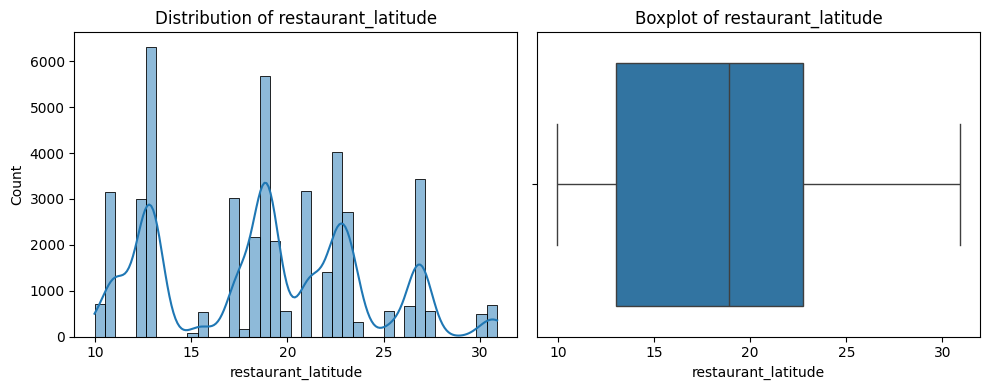

Summary statistics for: restaurant_longitude

count    45502.000000
mean        76.897455
std          3.361472
min         72.768726
25%         73.915367
50%         76.618203
75%         78.046106
max         88.433452
Name: restaurant_longitude, dtype: float64

Skewness   : 1.265
Kurtosis   : 1.874


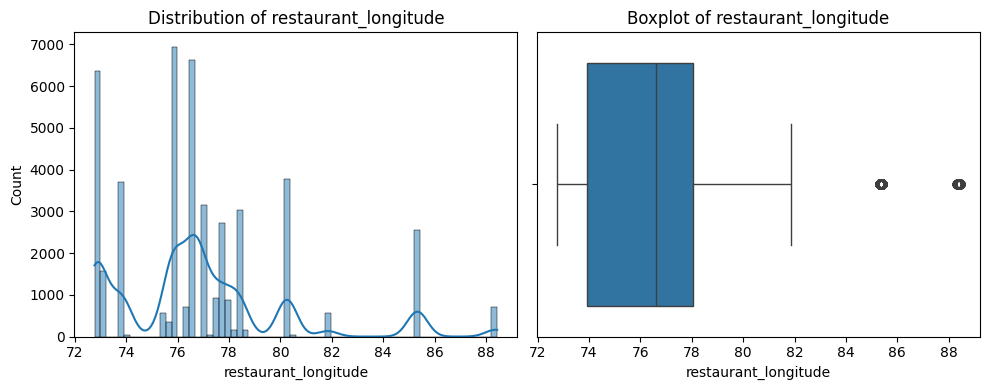

Summary statistics for: delivery_latitude

count    45502.000000
mean        18.977356
std          5.246366
min          9.967144
25%         13.096047
50%         18.977356
75%         22.785049
max         31.054057
Name: delivery_latitude, dtype: float64

Skewness   : 0.112
Kurtosis   : -0.825


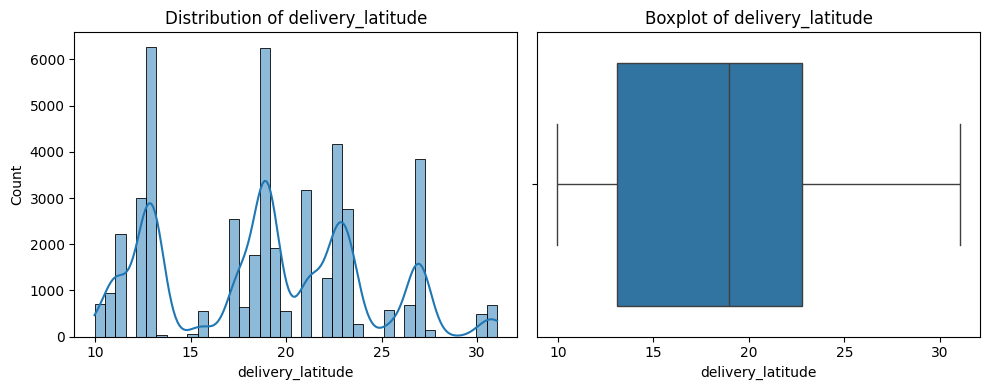

Summary statistics for: delivery_longitude

count    45502.000000
mean        76.959580
std          3.361751
min         72.778726
25%         74.006485
50%         76.662620
75%         78.105359
max         88.563452
Name: delivery_longitude, dtype: float64

Skewness   : 1.266
Kurtosis   : 1.873


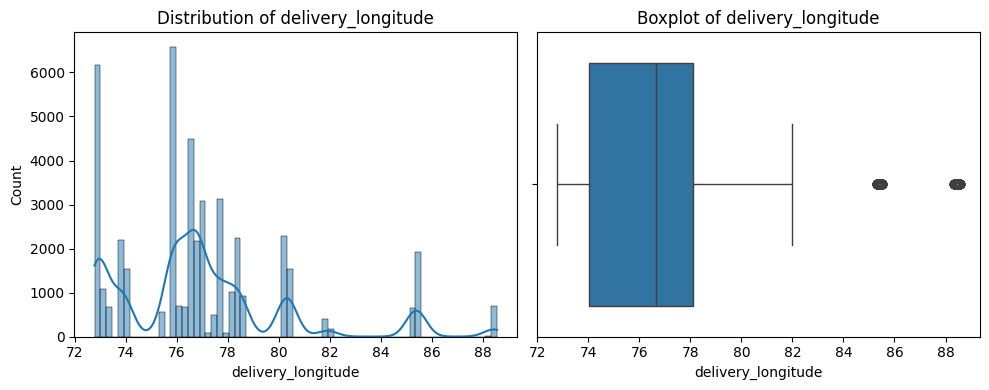

Summary statistics for: vehicle_condition

count    45502.000000
mean         1.019406
std          0.835229
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: vehicle_condition, dtype: float64

Skewness   : 0.061
Kurtosis   : -1.342


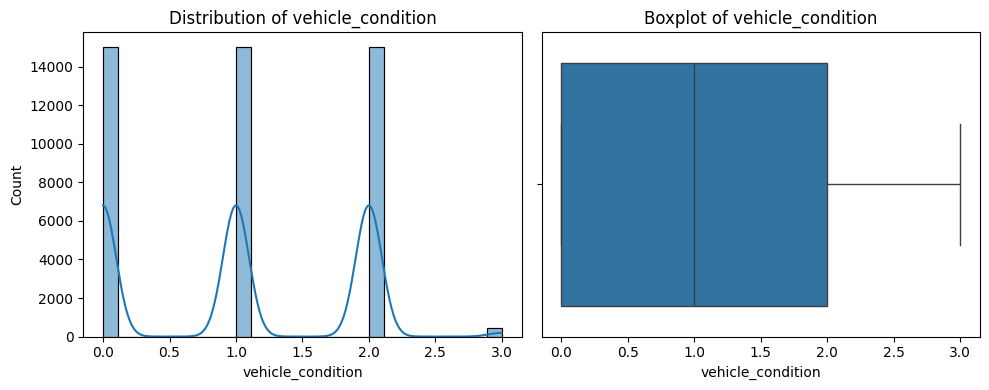

Summary statistics for: multiple_deliveries

count    45502.000000
mean         0.750494
std          0.567432
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: multiple_deliveries, dtype: float64

Skewness   : 0.299
Kurtosis   : 0.953


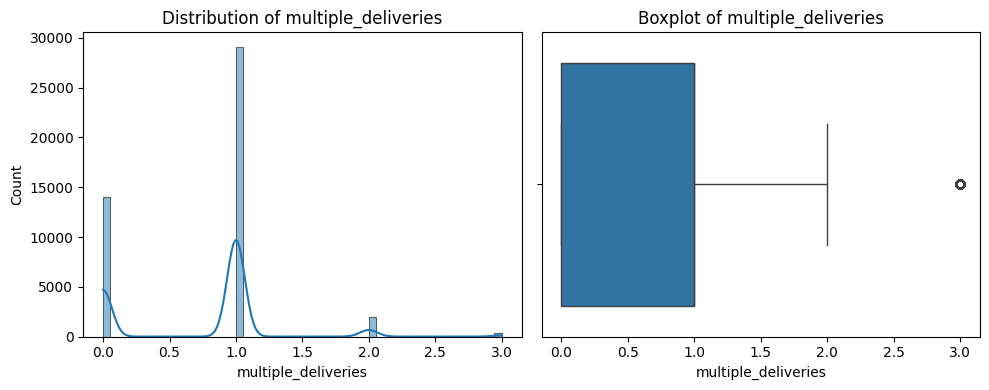

Summary statistics for: time_taken

count    45502.000000
mean        26.297591
std          9.386419
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: time_taken, dtype: float64

Skewness   : 0.486
Kurtosis   : -0.312


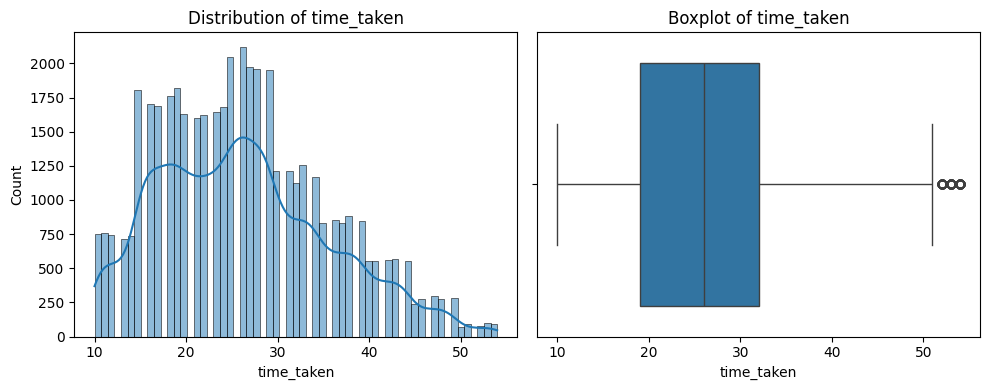

Summary statistics for: order_day

count    45502.000000
mean        13.811657
std          8.709540
min          1.000000
25%          6.000000
50%         13.000000
75%         20.000000
max         31.000000
Name: order_day, dtype: float64

Skewness   : 0.299
Kurtosis   : -0.970


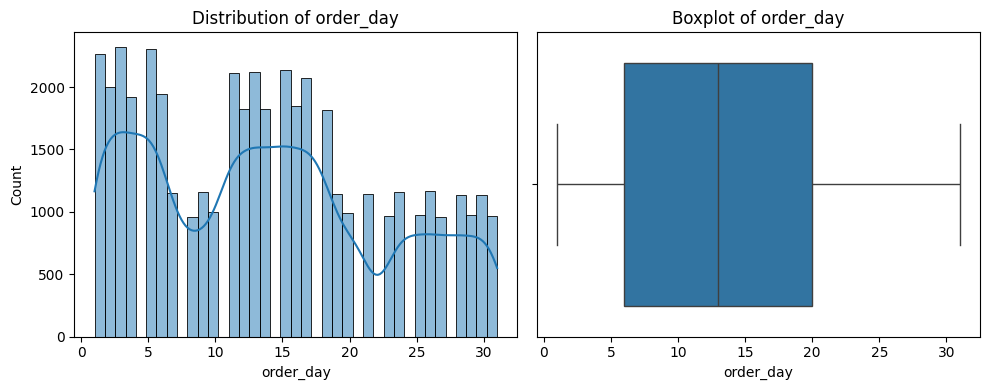

Summary statistics for: order_month

count    45502.000000
mean         2.980726
std          0.546031
min          2.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: order_month, dtype: float64

Skewness   : -0.012
Kurtosis   : 0.349


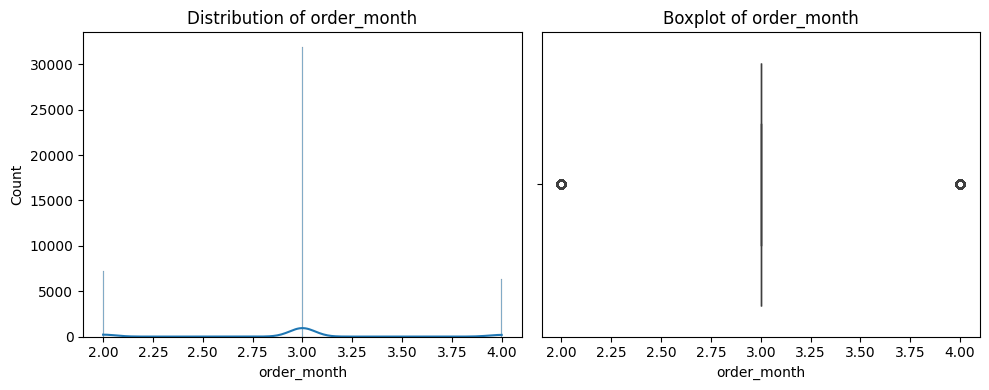

Summary statistics for: is_weekend

count    45502.000000
mean         0.274867
std          0.446452
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_weekend, dtype: float64

Skewness   : 1.009
Kurtosis   : -0.983


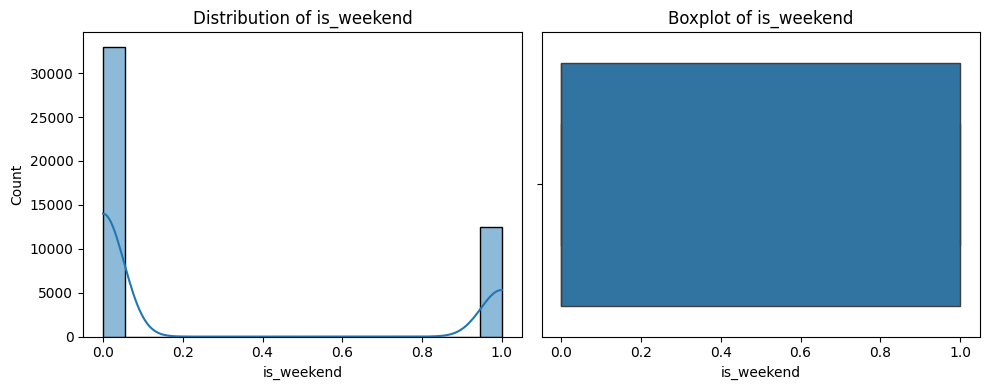

Summary statistics for: pickup_time_minutes

count    45502.000000
mean         9.989399
std          4.013176
min          5.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         15.000000
Name: pickup_time_minutes, dtype: float64

Skewness   : 0.004
Kurtosis   : -1.448


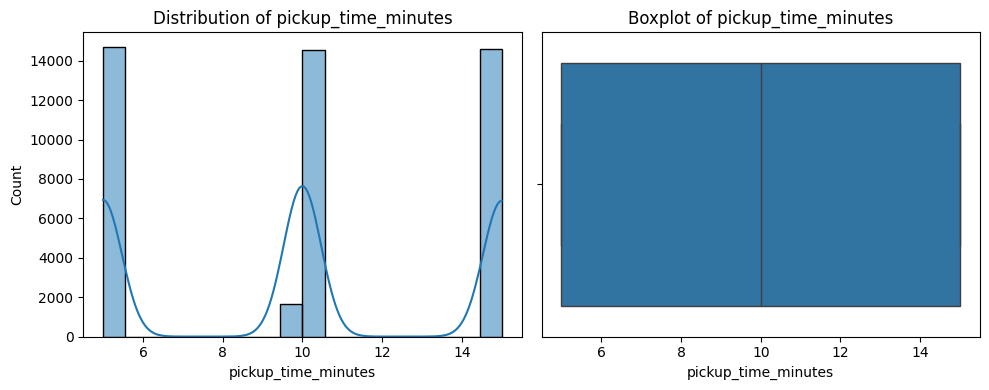

Summary statistics for: order_time_hour

count    45502.000000
mean        17.480770
std          4.739347
min          0.000000
25%         15.000000
50%         19.000000
75%         21.000000
max         23.000000
Name: order_time_hour, dtype: float64

Skewness   : -1.071
Kurtosis   : 0.612


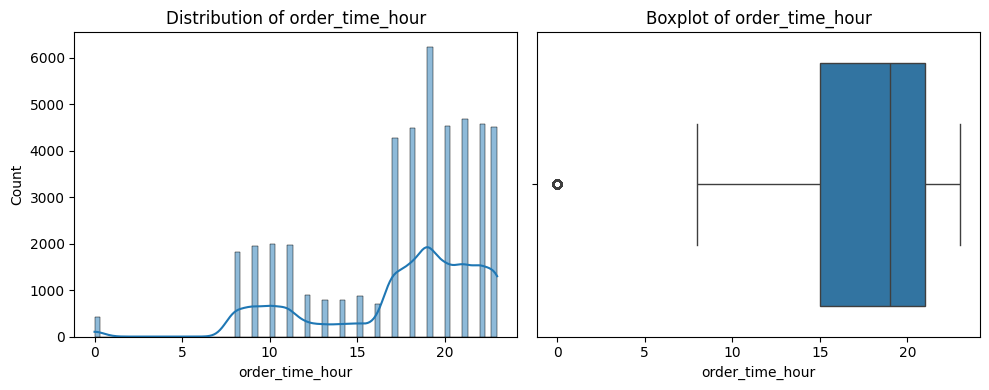

Summary statistics for: distance

count    45502.000000
mean         9.677311
std          5.376642
min          1.465067
25%          5.875219
50%          9.193014
75%         13.409281
max         20.969489
Name: distance, dtype: float64

Skewness   : 0.362
Kurtosis   : -0.716


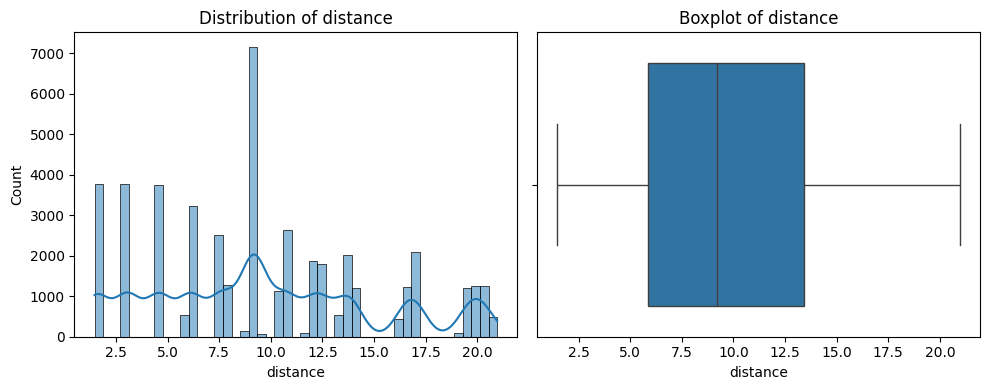

In [45]:
def num_univariate(df):
    num_cols = df.select_dtypes(include=["int64", "float64"]).columns

    for col in num_cols:
        print("="*60)
        print(f"Summary statistics for: {col}\n")
        print(df[col].describe())
        print(f"\nSkewness   : {df[col].skew():.3f}")
        print(f"Kurtosis   : {df[col].kurtosis():.3f}")
        print("="*60)

        # Plotting
        plt.figure(figsize=(10, 4))

        # Histogram + KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")

        plt.tight_layout()
        plt.show()

num_univariate(df)


# Categorical 

In [46]:
df.select_dtypes(include=["object"]).columns

C:\Users\User\AppData\Local\Temp\ipykernel_17188\2790643224.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.select_dtypes(include=["object"]).columns


Index(['rider_id', 'order_date', 'weather', 'traffic', 'type_of_order',
       'type_of_vehicle', 'festival', 'city_type', 'city_name',
       'order_day_of_week', 'order_time_of_day'],
      dtype='str')

In [47]:
for i in df.select_dtypes(include=["object"]).columns[2:]:
    print(f"{i} {df[i].nunique()}")

weather 6
traffic 4
type_of_order 4
type_of_vehicle 4
festival 2
city_type 3
city_name 22
order_day_of_week 7
order_time_of_day 5


C:\Users\User\AppData\Local\Temp\ipykernel_17188\3287266342.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for i in df.select_dtypes(include=["object"]).columns[2:]:


C:\Users\User\AppData\Local\Temp\ipykernel_17188\911182509.py:48: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat=df.select_dtypes(include=["object"]).columns[2:]



Feature: weather | Unique values: 6


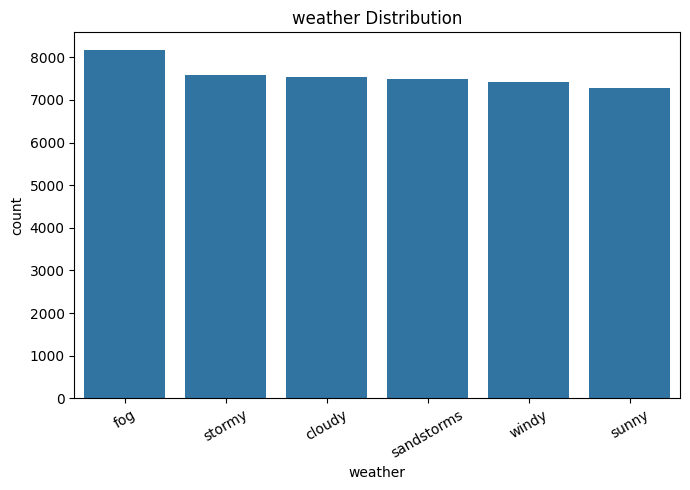


Feature: traffic | Unique values: 4


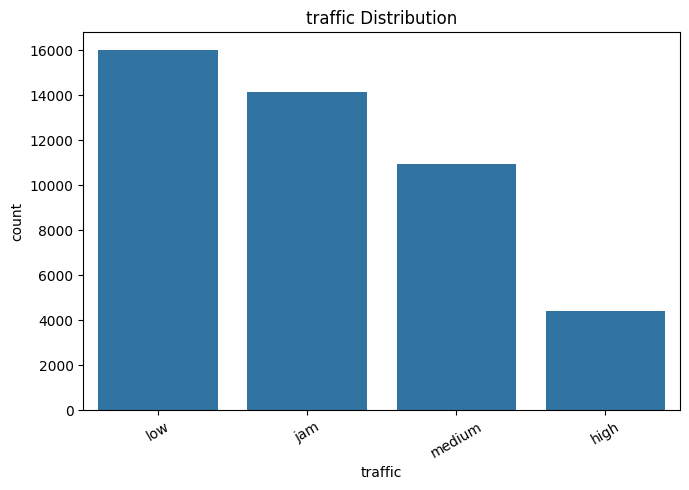


Feature: type_of_order | Unique values: 4


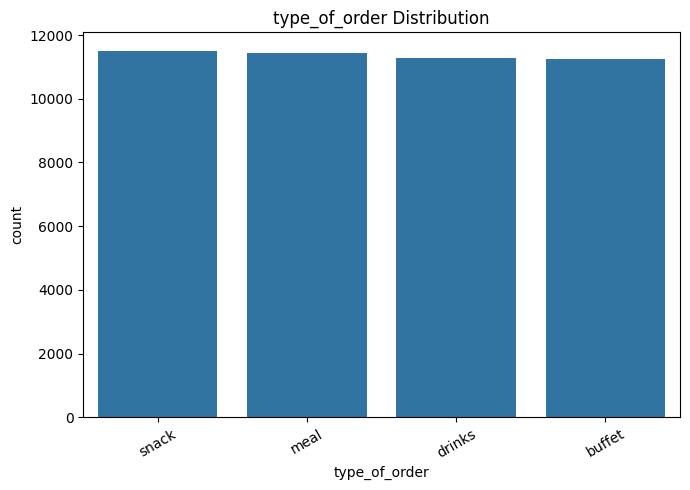


Feature: type_of_vehicle | Unique values: 4


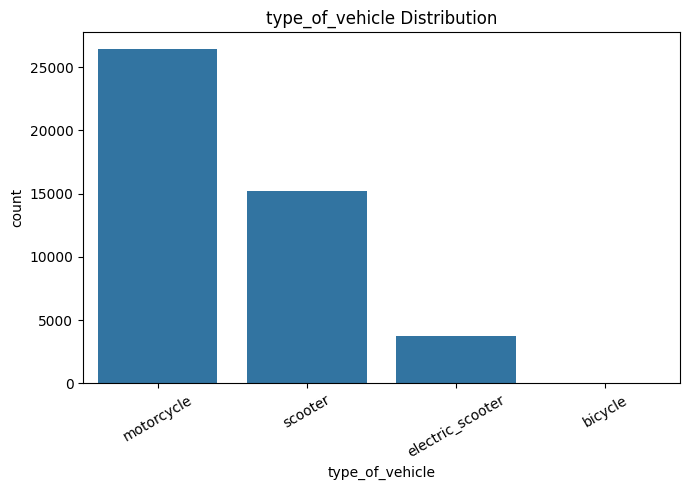


Feature: festival | Unique values: 2


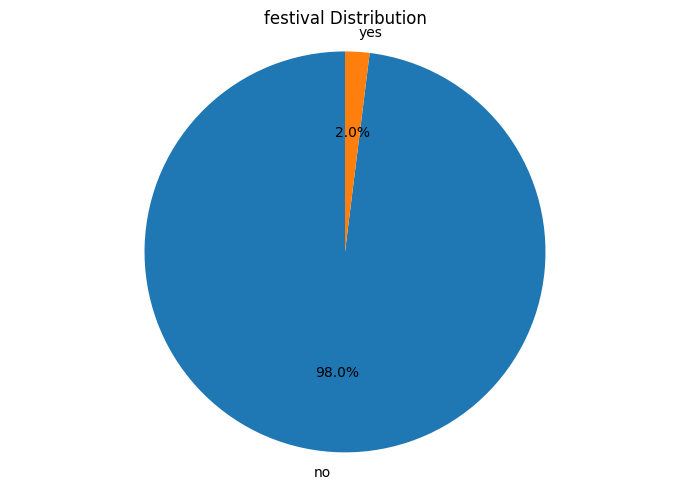


Feature: city_type | Unique values: 3


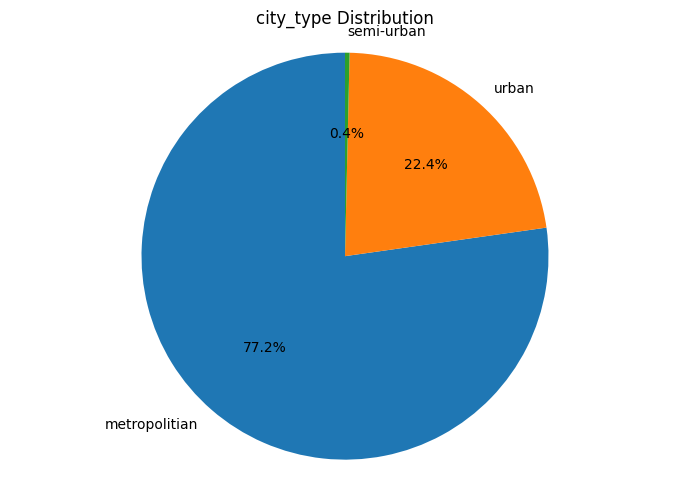


Feature: city_name | Unique values: 22


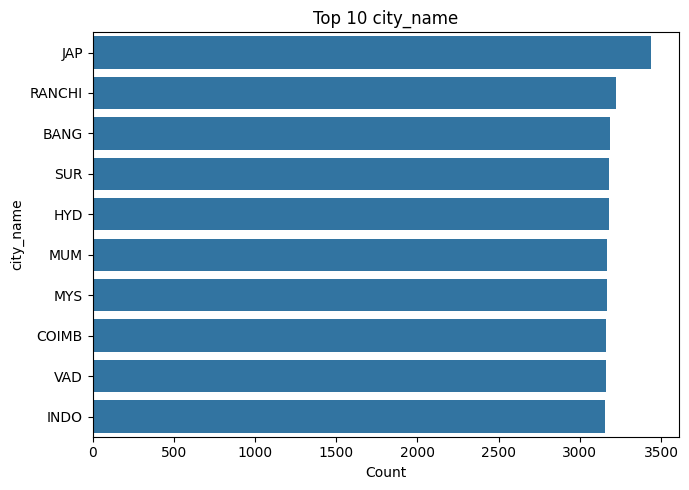


Feature: order_day_of_week | Unique values: 7


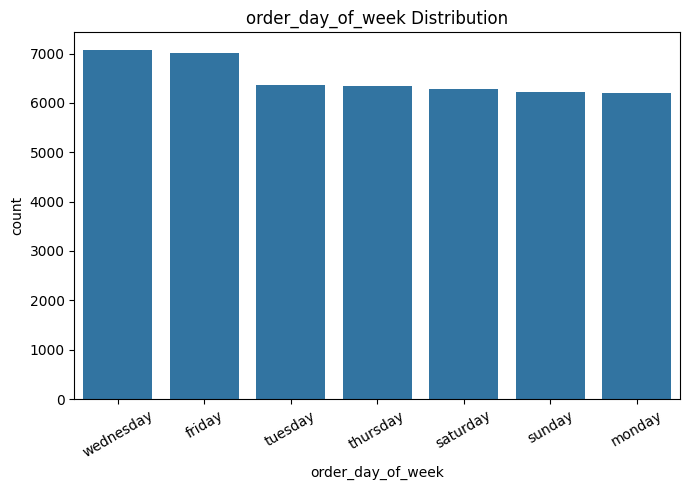


Feature: order_time_of_day | Unique values: 5


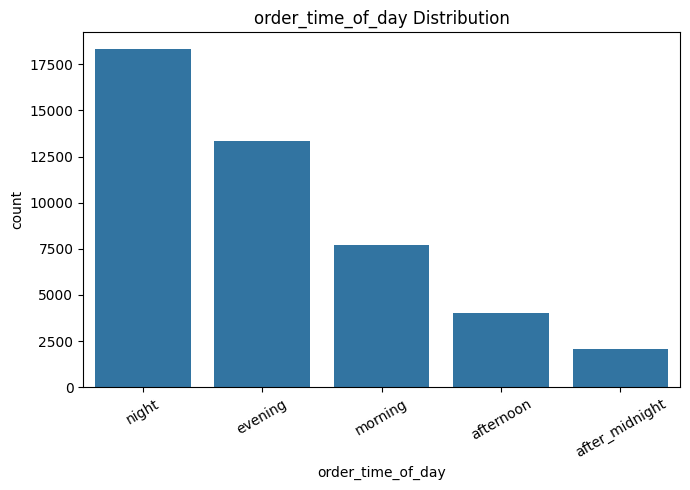

In [48]:
def categorical_univariate_plots(df, cat_cols):
    for col in cat_cols:
        nunique = df[col].nunique()
        counts = df[col].value_counts()

        print(f"\nFeature: {col} | Unique values: {nunique}")

        plt.figure(figsize=(7, 5))

        # Case 1: Very low cardinality → Pie chart
        if nunique <= 3:
            plt.pie(
                counts.values,
                labels=counts.index,
                autopct='%1.1f%%',
                startangle=90
            )
            plt.title(f"{col} Distribution")
            plt.axis('equal')

        # Case 2: High cardinality → Top 10 (City Name)
        elif col == "city_name" or nunique > 15:
            top_10 = counts.head(10)
            sns.barplot(x=top_10.values, y=top_10.index)
            plt.title(f"Top 10 {col}")
            plt.xlabel("Count")
            plt.ylabel(col)

        # Case 3: Medium cardinality → Horizontal bar
        elif 8 <= nunique <= 15:
            sns.countplot(
                y=df[col],
                order=counts.index
            )
            plt.title(f"{col} Distribution")

        # Case 4: Normal categorical → Bar chart
        else:
            sns.countplot(
                x=df[col],
                order=counts.index
            )
            plt.title(f"{col} Distribution")
            plt.xticks(rotation=30)

        plt.tight_layout()
        plt.show()
cat=df.select_dtypes(include=["object"]).columns[2:]
categorical_univariate_plots(df, cat)


# Bivariate Analysis 

# Numerical vs Numerical

In [49]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='str')

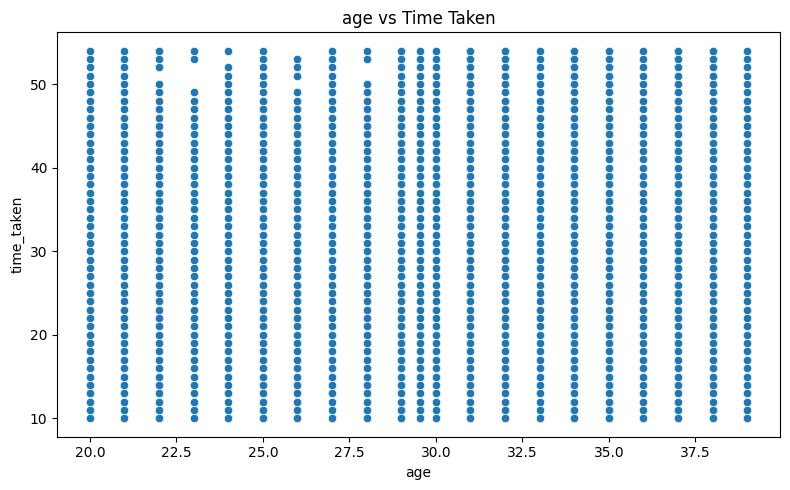

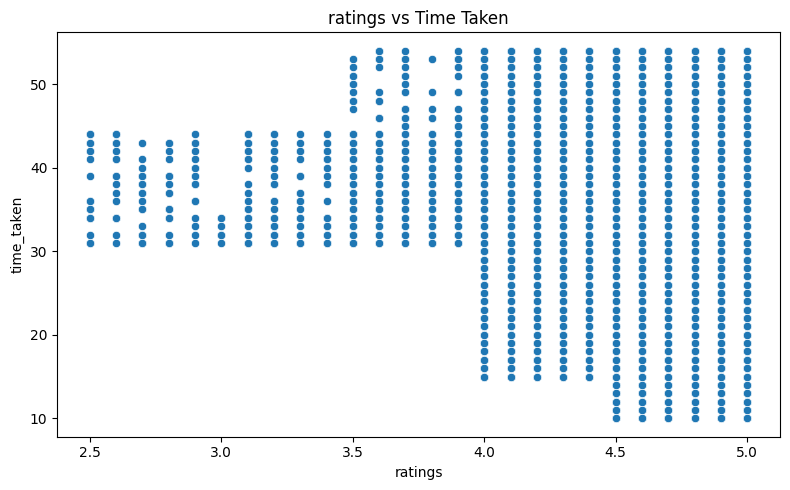

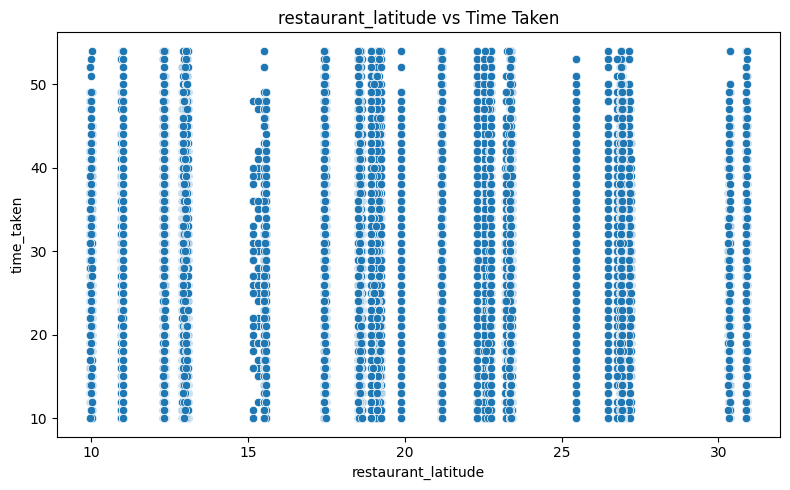

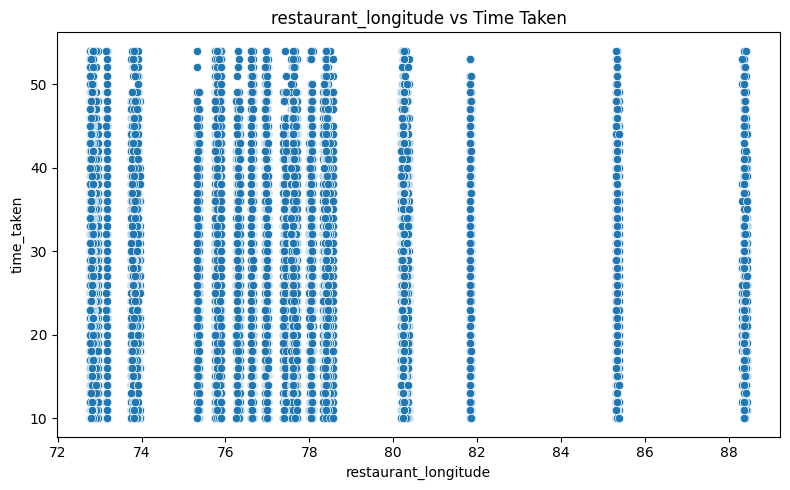

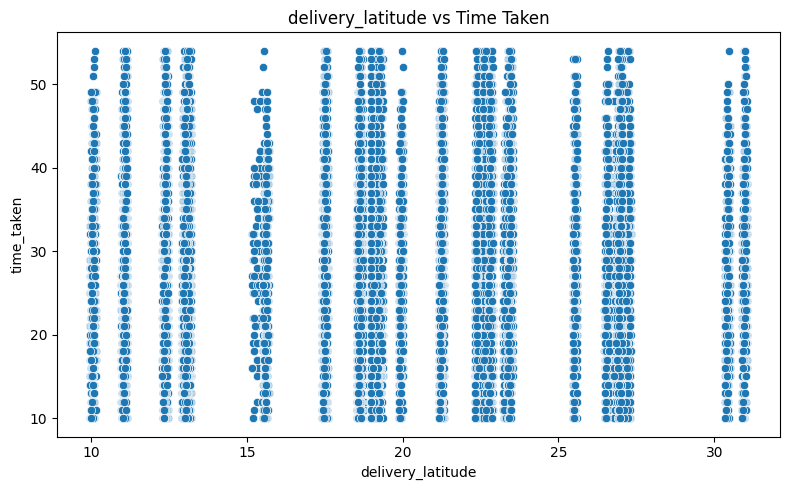

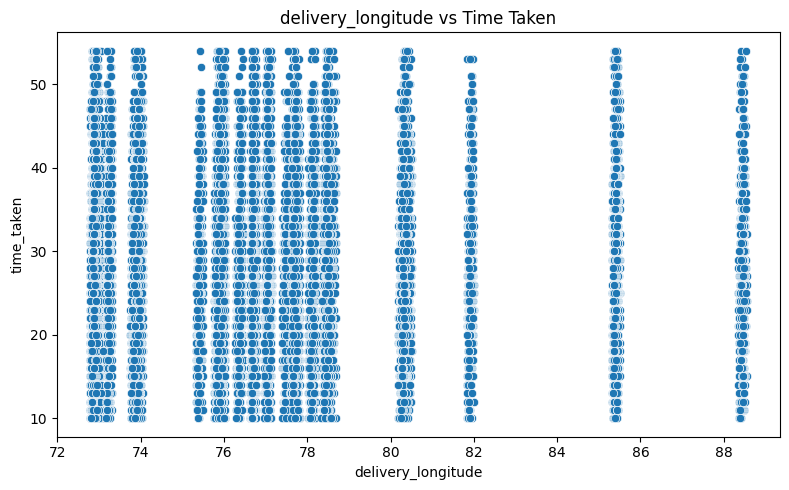

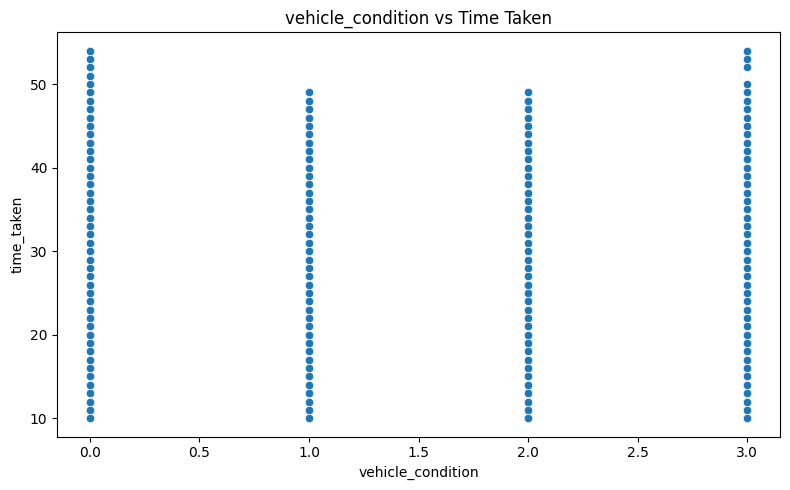

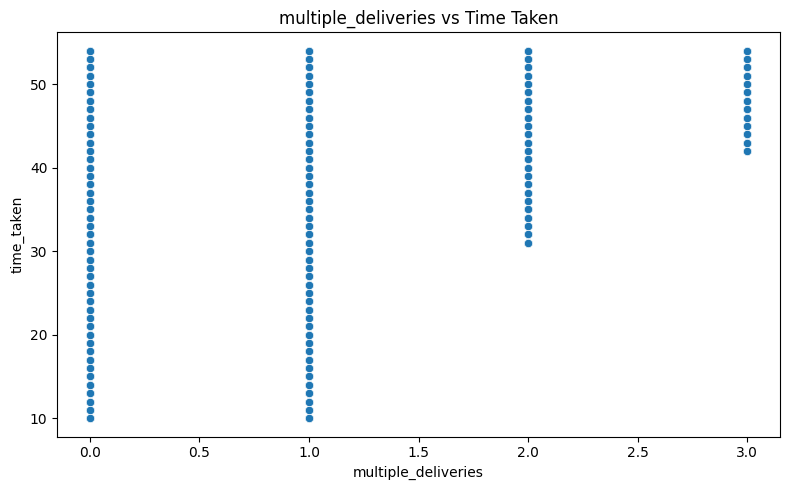

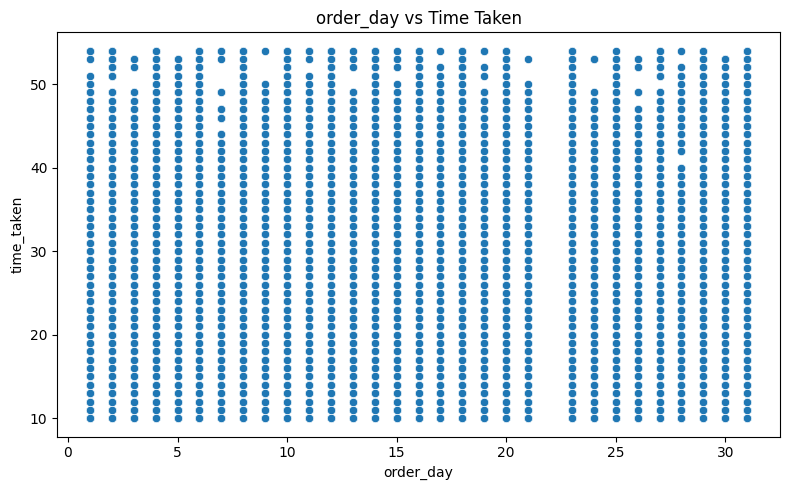

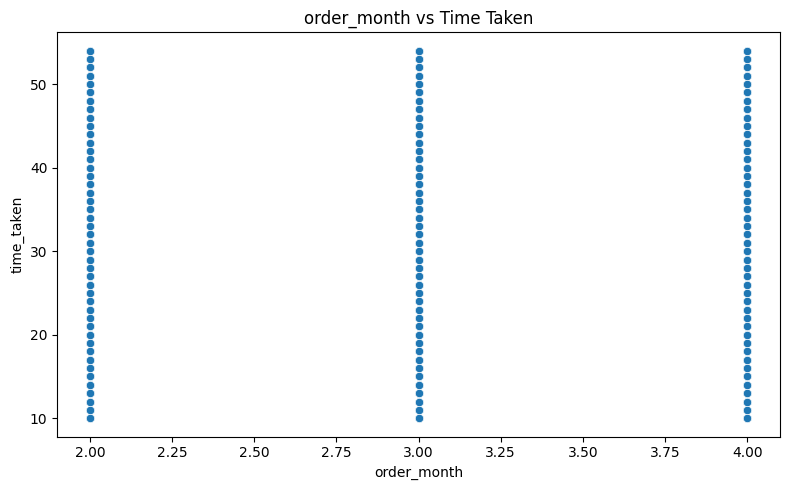

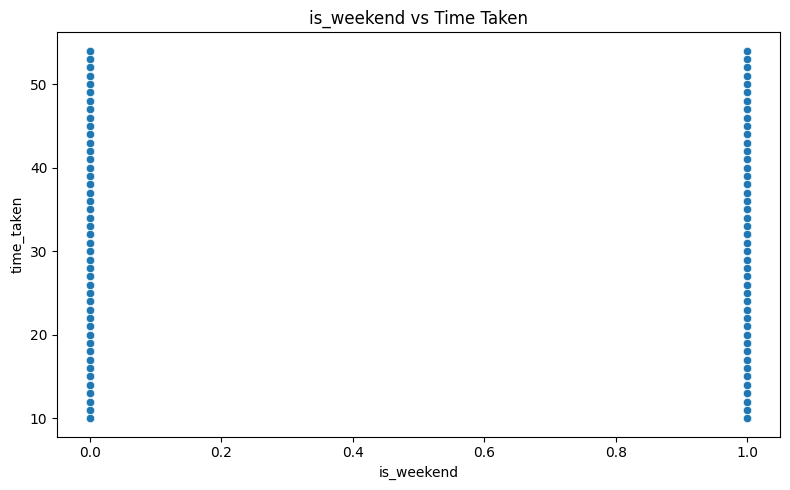

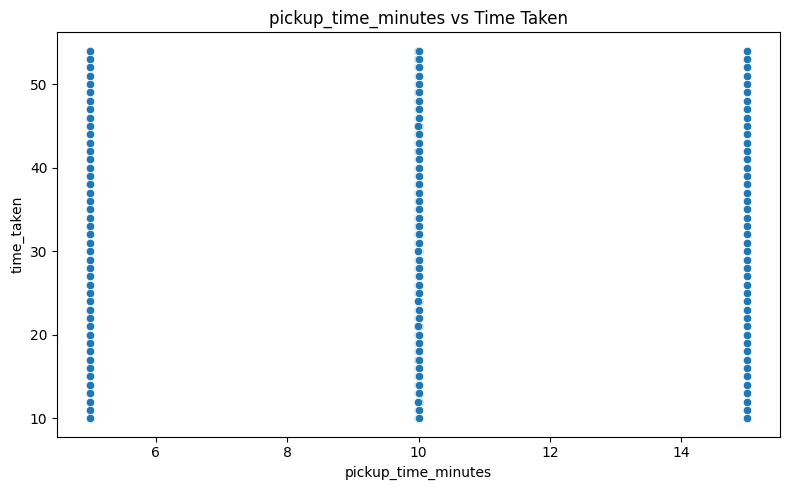

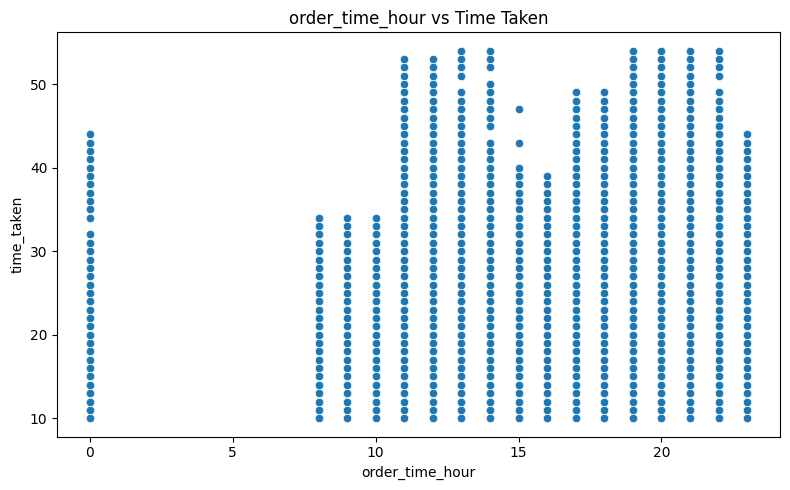

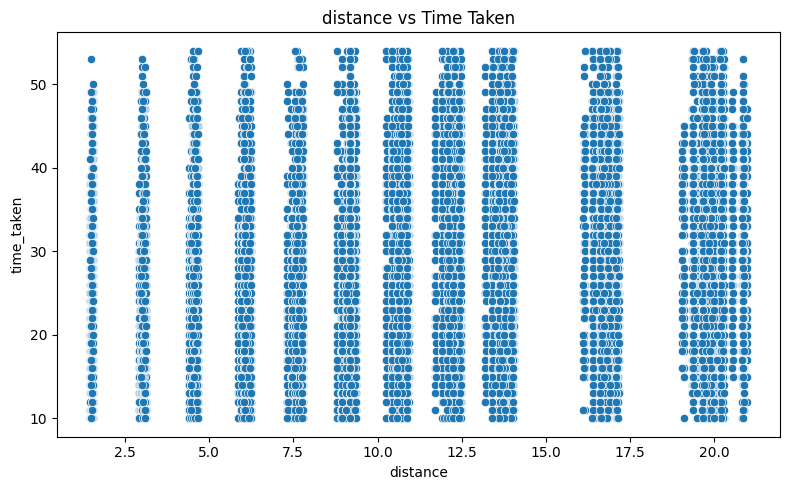

In [50]:
def num_vs_num(df):
    num_cols = df.select_dtypes(include=["int64", "float64"]).columns
    num_cols = [col for col in num_cols if col != "time_taken"]

    for col in num_cols:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[col], y=df["time_taken"])
        plt.title(f"{col} vs Time Taken")
        plt.xlabel(col)
        plt.ylabel("time_taken")
        plt.tight_layout()
        plt.show()
num_vs_num(df)

# Cat vs Cat

C:\Users\User\AppData\Local\Temp\ipykernel_17188\3186989986.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include=["object"]).columns[2:]



Analyzing: weather vs festival


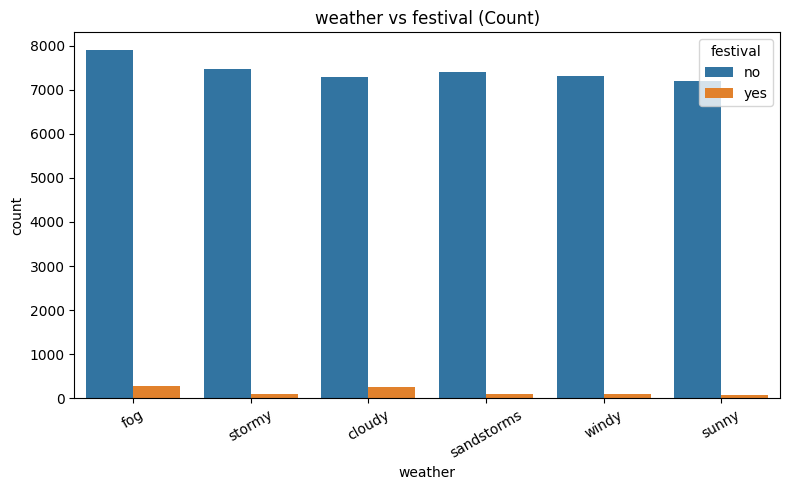

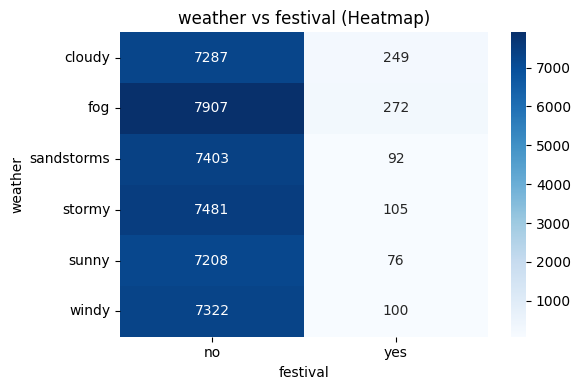

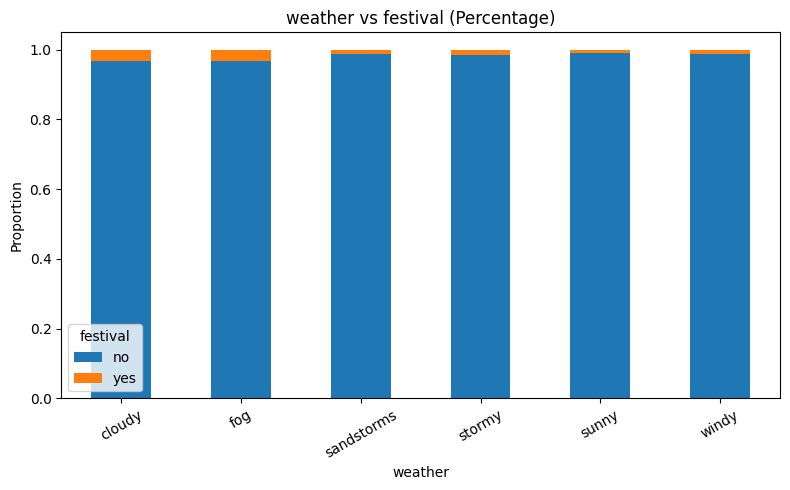


Analyzing: traffic vs festival


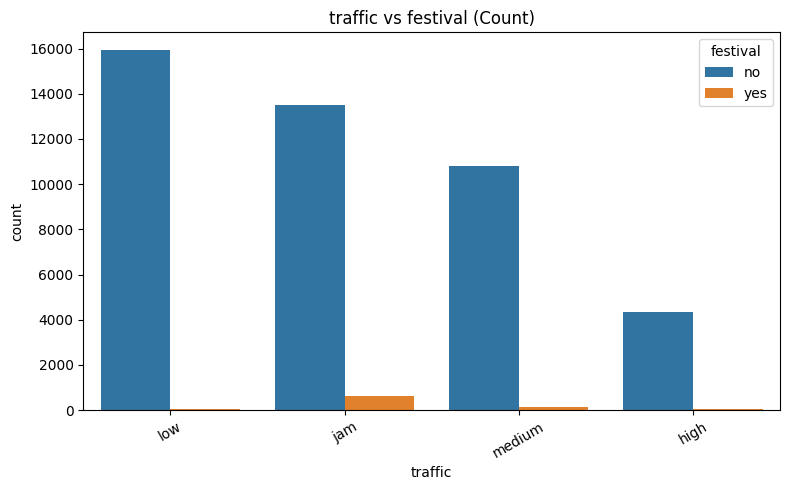

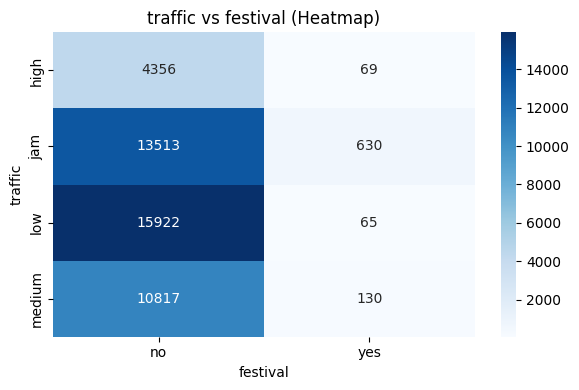

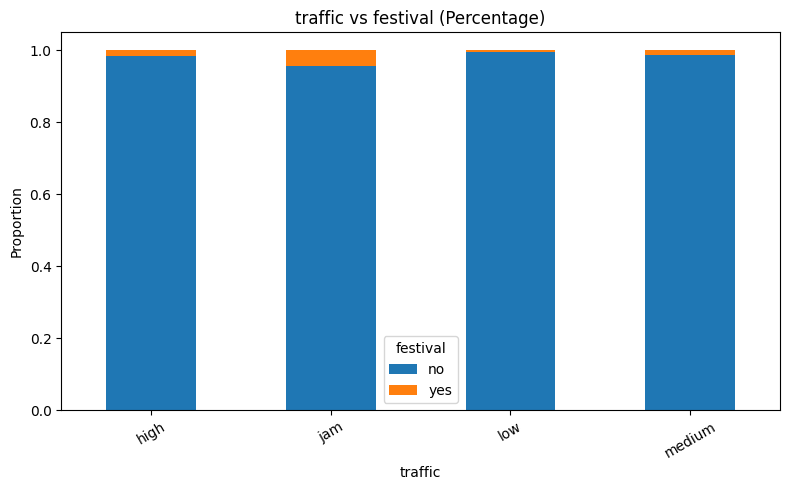


Analyzing: type_of_order vs festival


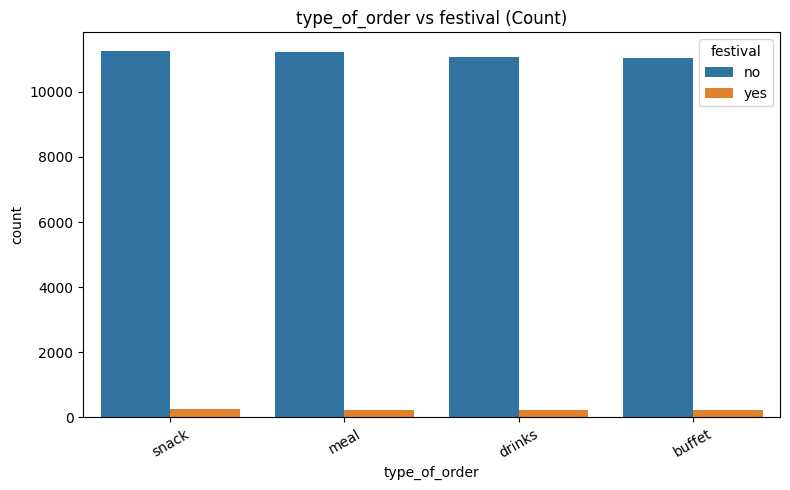

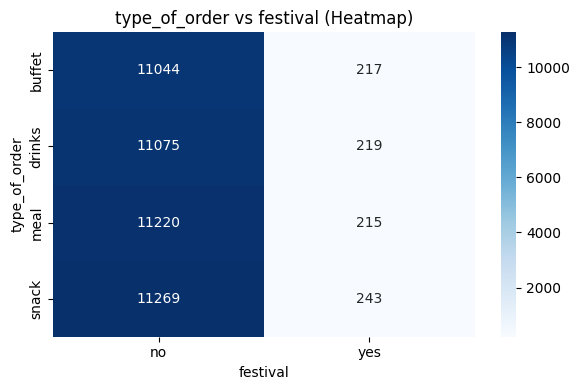

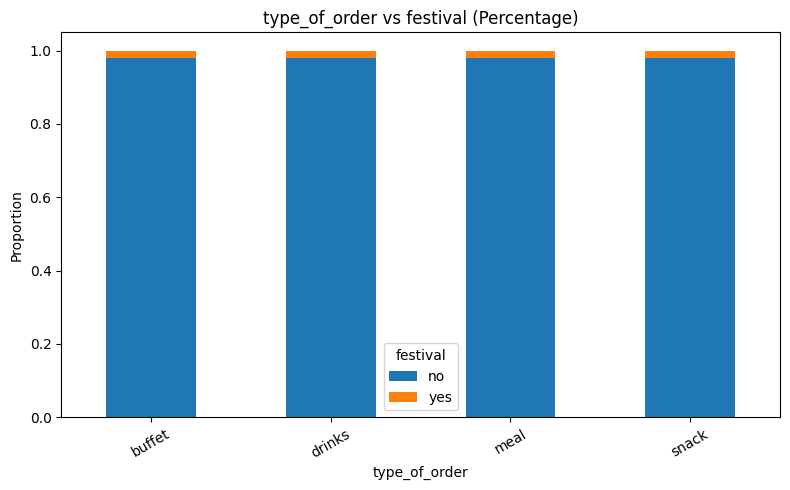


Analyzing: type_of_vehicle vs festival


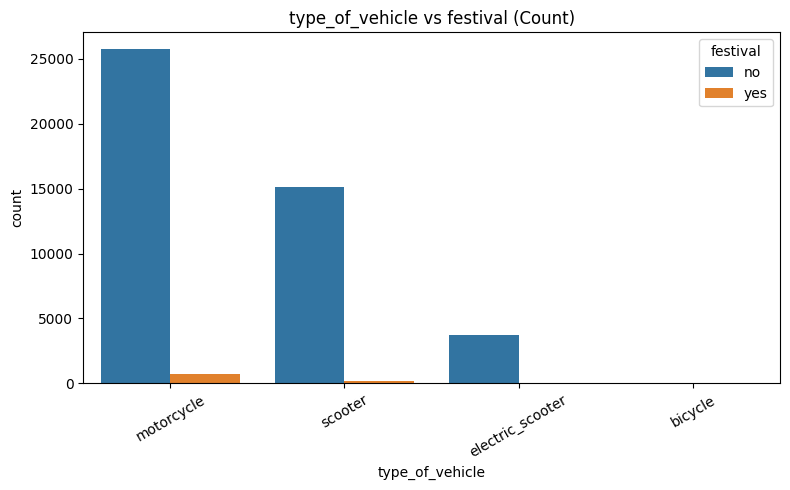

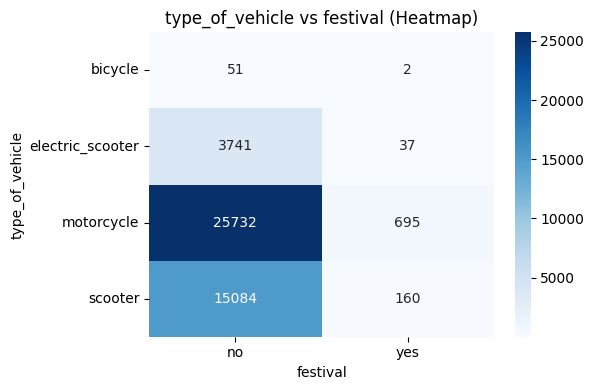

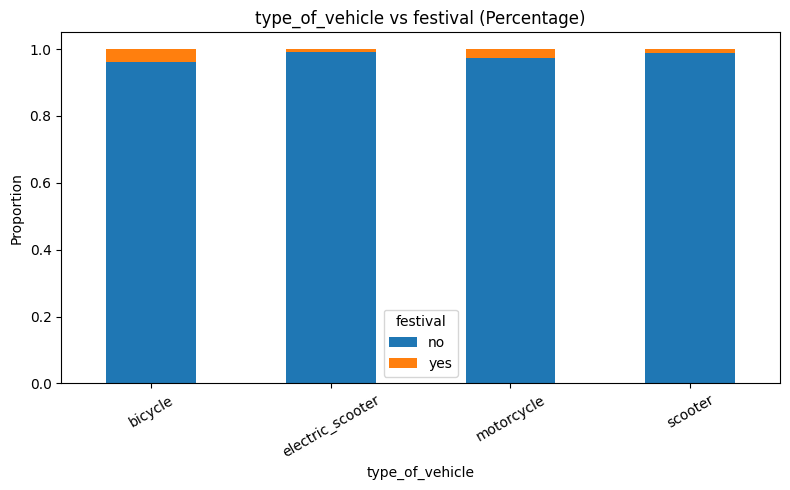


Analyzing: city_type vs festival


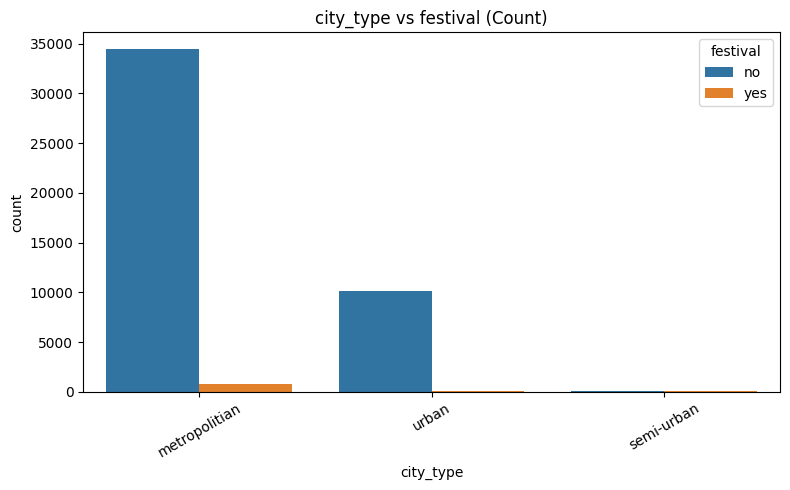

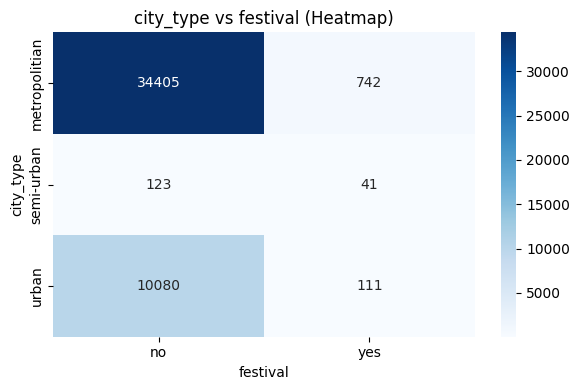

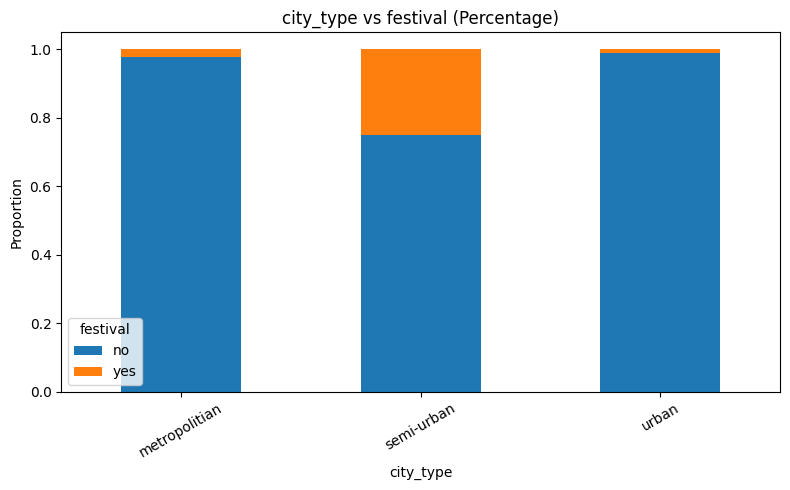


Analyzing: city_name vs festival


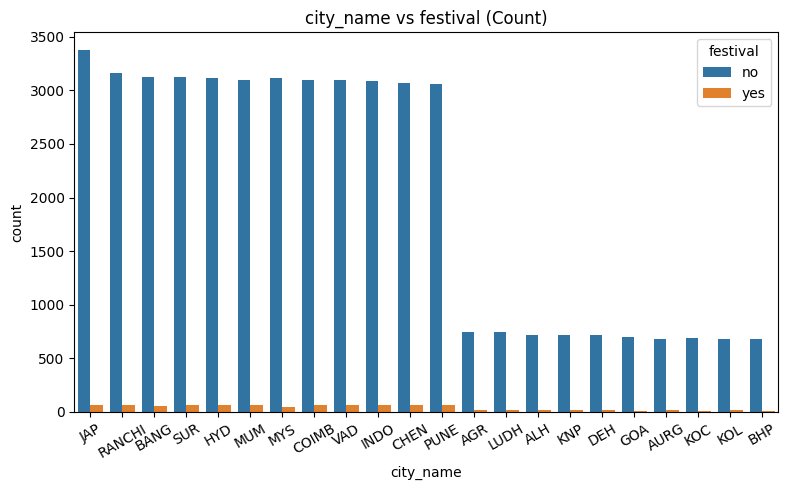

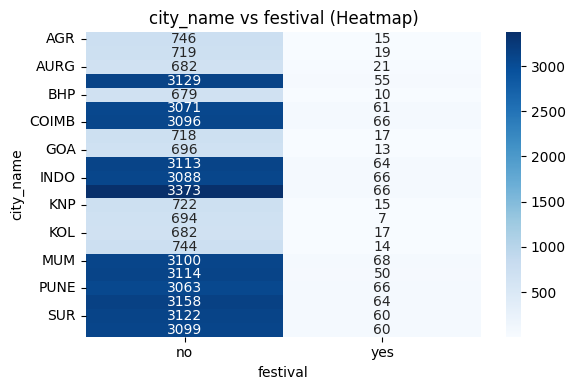

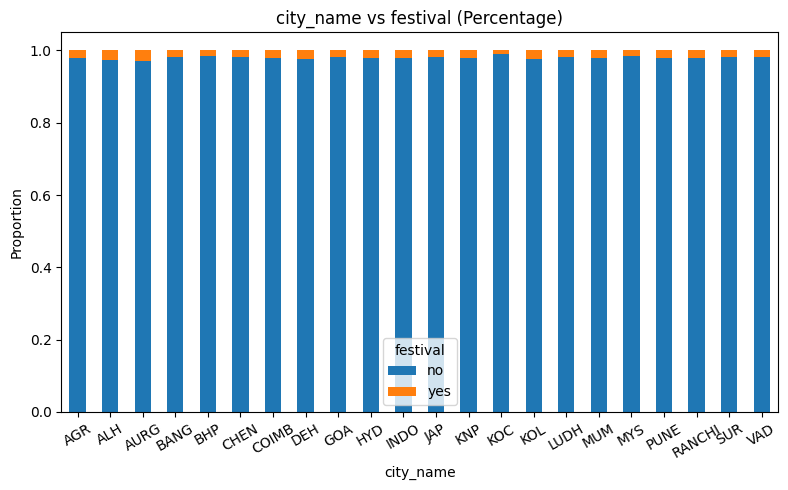


Analyzing: order_day_of_week vs festival


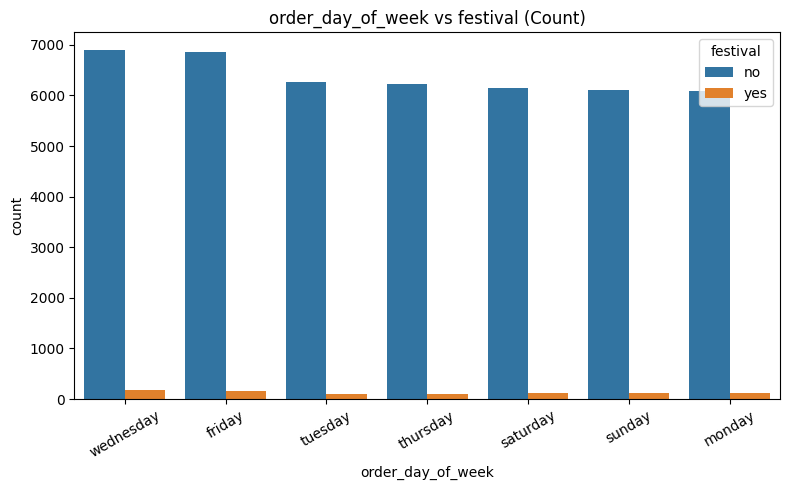

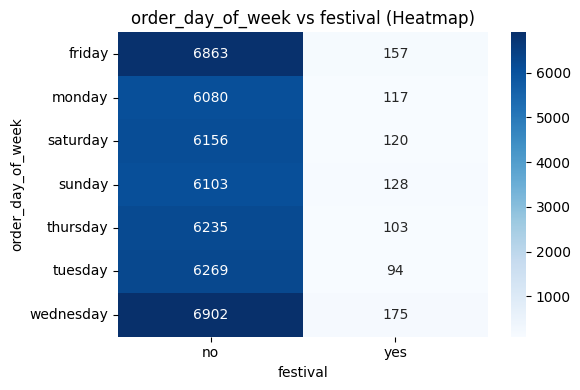

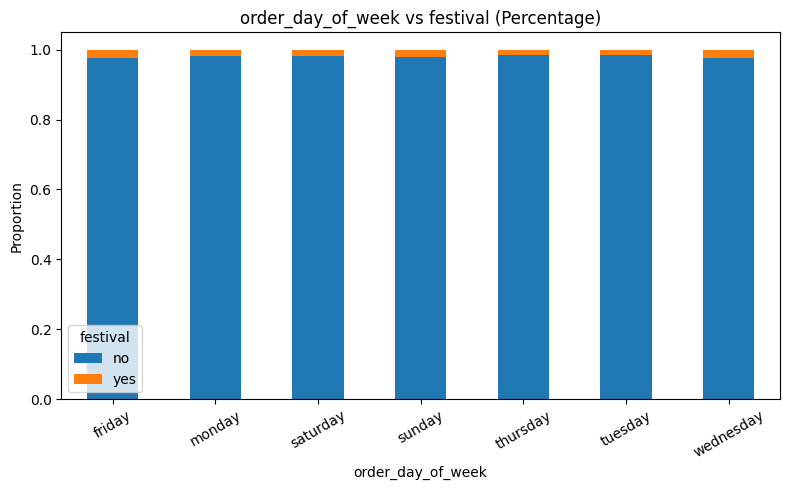


Analyzing: order_time_of_day vs festival


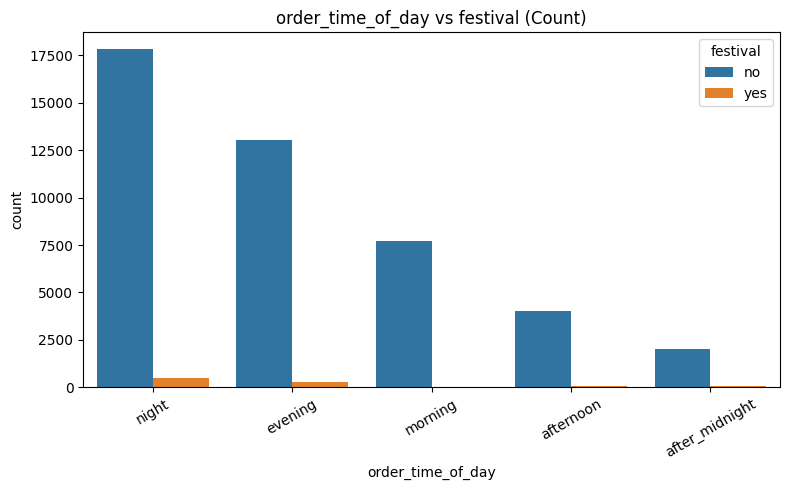

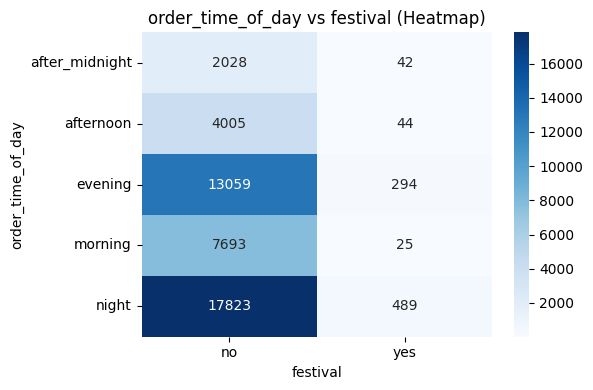

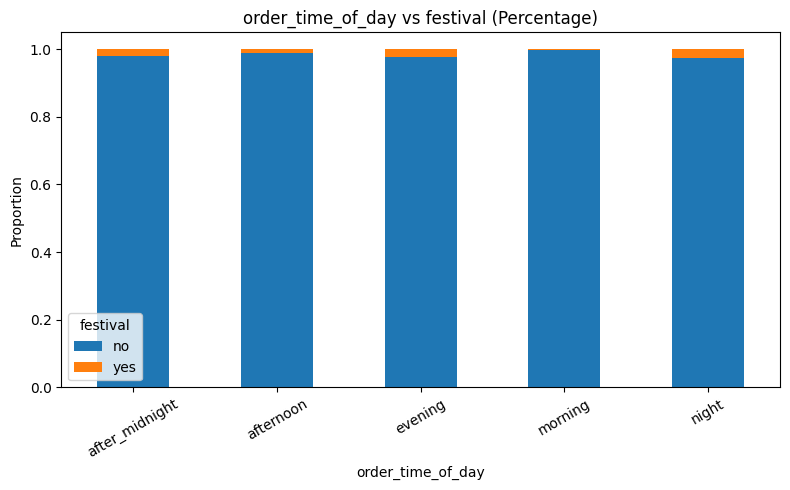

In [51]:
def cat_vs_cat_eda(df, base_cat):
    cat_cols = df.select_dtypes(include=["object"]).columns[2:]

    for col in cat_cols:
        if col == base_cat:
            continue

        print(f"\nAnalyzing: {col} vs {base_cat}")

    
        plt.figure(figsize=(8, 5))
        sns.countplot(
            x=df[col],
            hue=df[base_cat],
            order=df[col].value_counts().index
        )
        plt.title(f"{col} vs {base_cat} (Count)")
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

      
        ct = pd.crosstab(df[col], df[base_cat])

        plt.figure(figsize=(6, 4))
        sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
        plt.title(f"{col} vs {base_cat} (Heatmap)")
        plt.tight_layout()
        plt.show()

     
        ct_pct = ct.div(ct.sum(axis=1), axis=0)

        ct_pct.plot(
            kind="bar",
            stacked=True,
            figsize=(8, 5)
        )
        plt.title(f"{col} vs {base_cat} (Percentage)")
        plt.ylabel("Proportion")
        plt.xticks(rotation=30)
        plt.legend(title=base_cat)
        plt.tight_layout()
        plt.show()
cat_vs_cat_eda(df, base_cat="festival")

# Categorical vs Numerical

C:\Users\User\AppData\Local\Temp\ipykernel_17188\1423266411.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include=["object"]).columns[2:]



Analyzing: weather vs time_taken


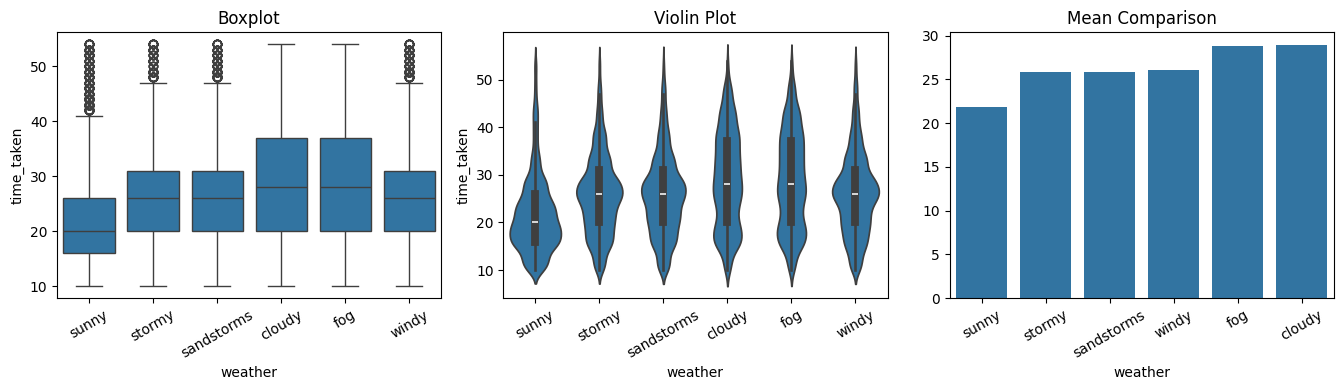


Analyzing: traffic vs time_taken


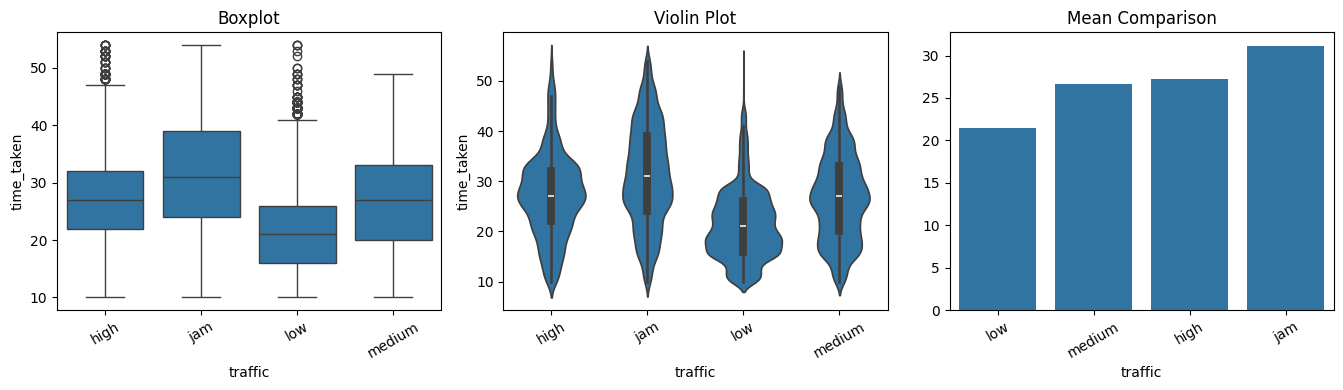


Analyzing: type_of_order vs time_taken


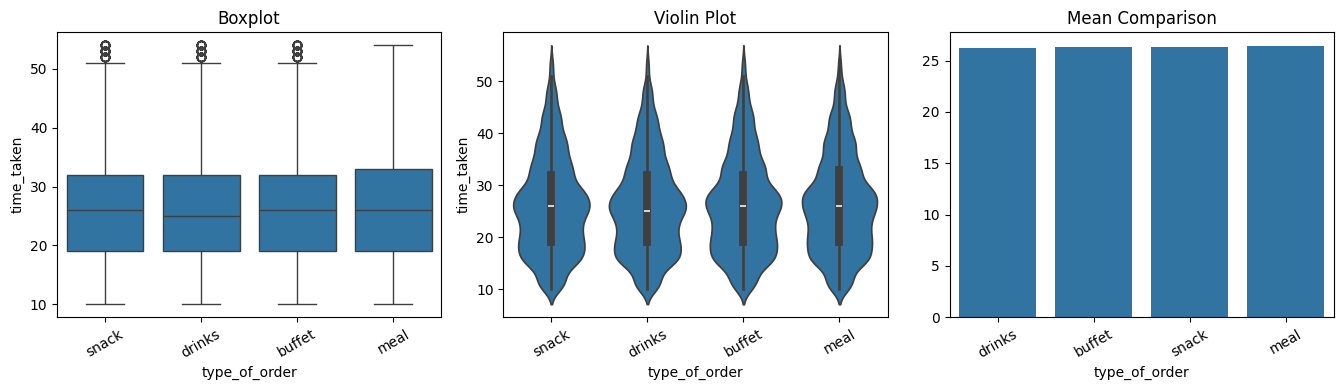


Analyzing: type_of_vehicle vs time_taken


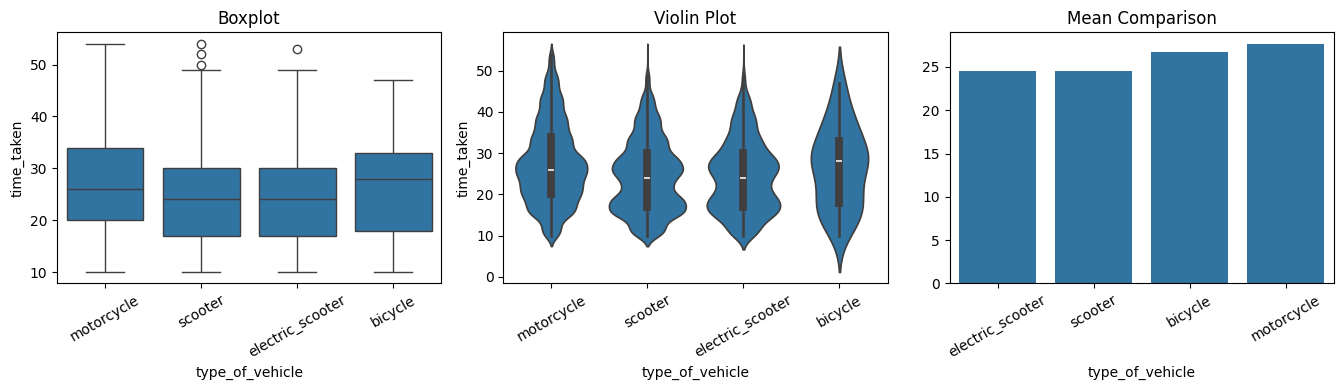


Analyzing: festival vs time_taken


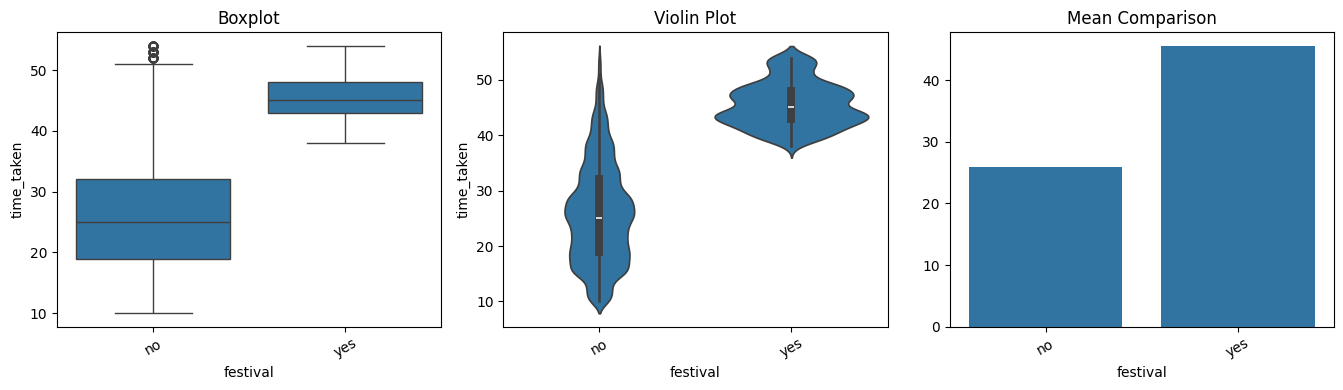


Analyzing: city_type vs time_taken


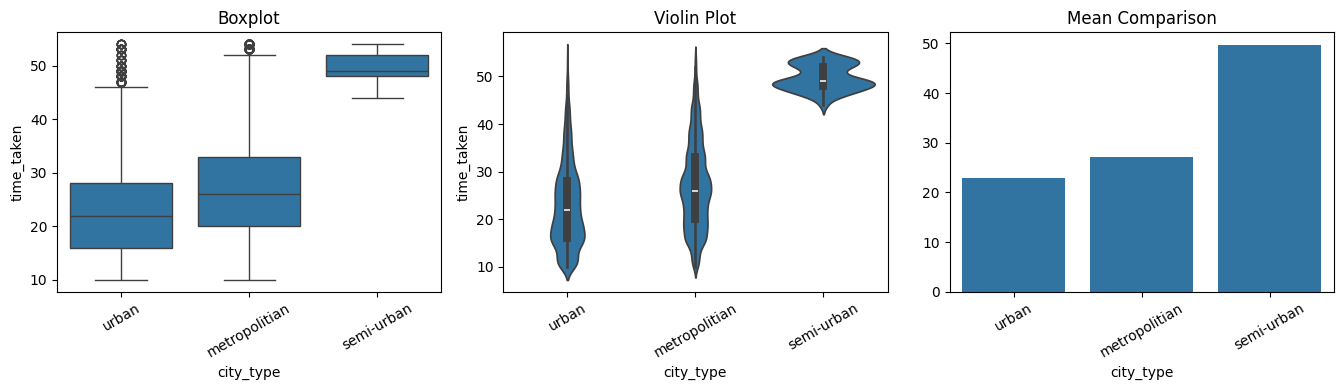


Analyzing: city_name vs time_taken


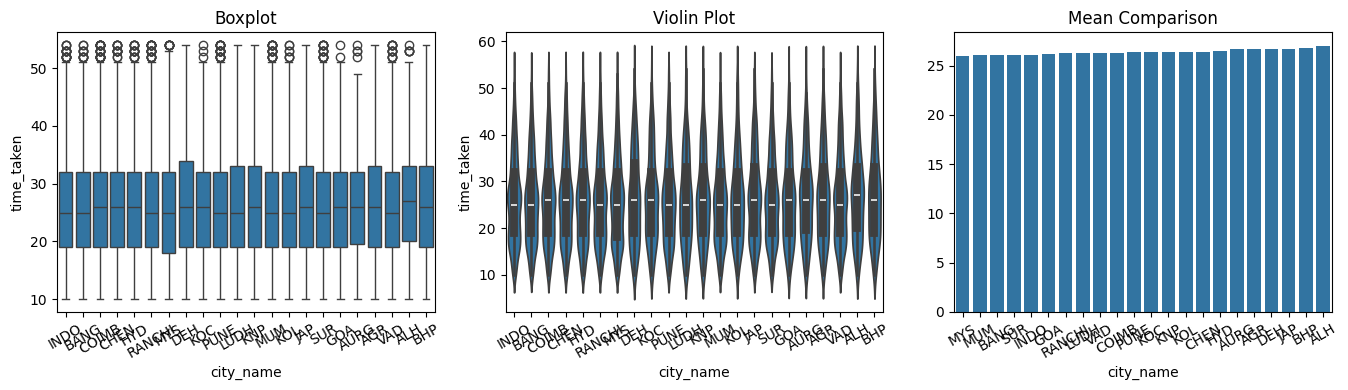


Analyzing: order_day_of_week vs time_taken


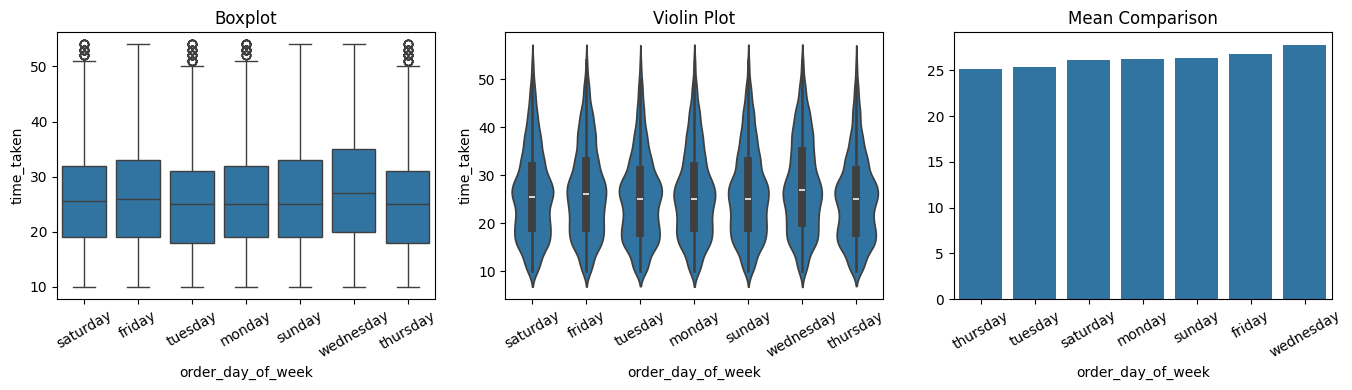


Analyzing: order_time_of_day vs time_taken


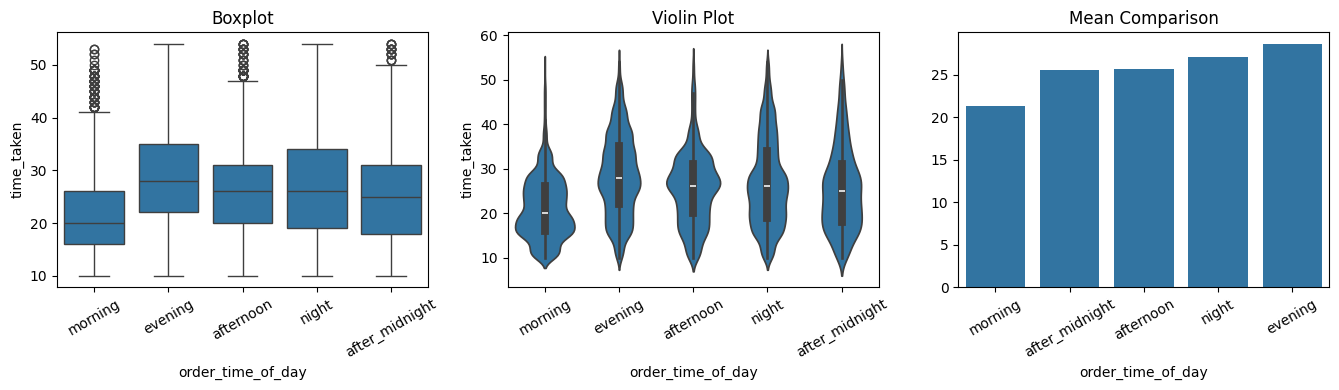

In [52]:
def cat_vs_num_eda(df, target_num):
    cat_cols = df.select_dtypes(include=["object"]).columns[2:]

    for col in cat_cols:
        print(f"\nAnalyzing: {col} vs {target_num}")

        plt.figure(figsize=(18, 4))

       
        plt.subplot(1, 4, 1)
        sns.boxplot(x=df[col], y=df[target_num])
        plt.title("Boxplot")
        plt.xticks(rotation=30)


        plt.subplot(1, 4, 2)
        sns.violinplot(x=df[col], y=df[target_num])
        plt.title("Violin Plot")
        plt.xticks(rotation=30)

        plt.subplot(1, 4, 3)
        mean_vals = df.groupby(col)[target_num].mean().sort_values()
        sns.barplot(x=mean_vals.index, y=mean_vals.values)
        plt.title("Mean Comparison")
        plt.xticks(rotation=30)

        # # =========================
        # # 4️⃣ Strip Plot (optional)
        # # =========================
        # plt.subplot(1, 4, 4)
        # sns.stripplot(x=df[col], y=df[target_num], alpha=0.5)
        # plt.title("Data Density")
        # plt.xticks(rotation=30)

        plt.tight_layout()
        plt.show()

cat_vs_num_eda(df, target_num="time_taken")


# Outlier 

# outlier detection

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='str')

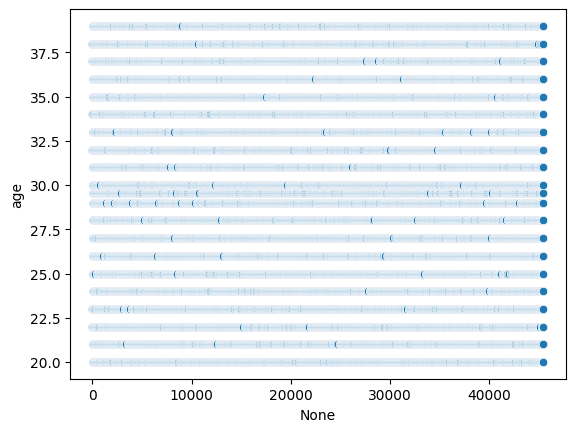

In [55]:
sns.scatterplot(x=df.index, y="age", data=df)
plt.show()



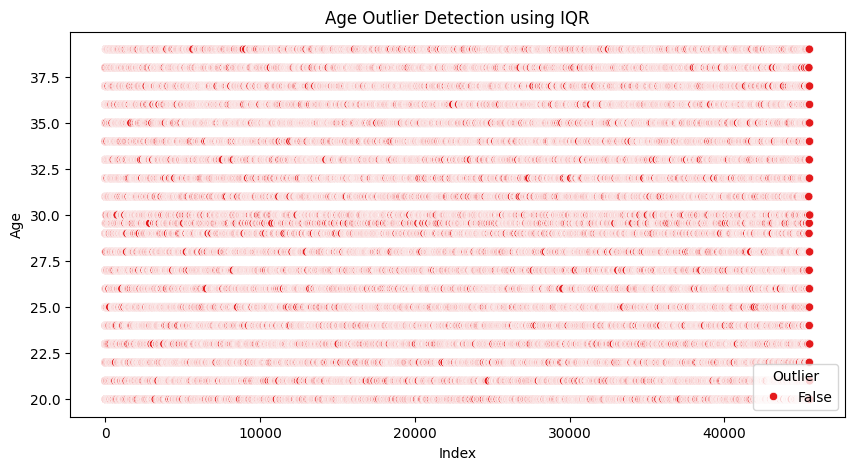

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Mark outliers
df["outlier"] = (df["age"] < lower) | (df["age"] > upper)

# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=df.index,
    y="age",
    hue="outlier",
    data=df,
    palette="Set1"   # ✅ valid palette
)

plt.title("Age Outlier Detection using IQR")
plt.xlabel("Index")
plt.ylabel("Age")
plt.legend(title="Outlier")
plt.show()



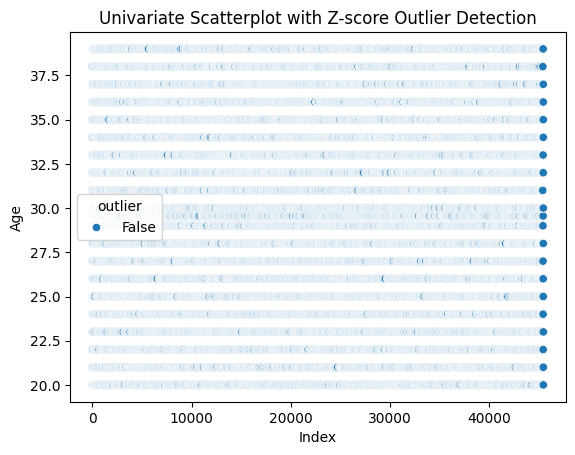

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Compute z-scores
df["z_score"] = zscore(df["age"])

# Flag outliers
df["outlier"] = df["z_score"].abs() > 3

# Scatterplot (age vs index)
sns.scatterplot(
    x=df.index,
    y="age",
    hue="outlier",
    data=df
)

plt.xlabel("Index")
plt.ylabel("Age")
plt.title("Univariate Scatterplot with Z-score Outlier Detection")
plt.show()


In [58]:
df.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance,outlier,z_score
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,19,3,saturday,1,15.0,11.0,morning,3.025149,False,1.319374
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,25,3,friday,0,5.0,19.0,evening,20.183530,False,0.787725
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,19,3,saturday,1,15.0,8.0,morning,1.552758,False,-1.161655
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,5,4,tuesday,0,10.0,18.0,evening,7.790401,False,1.496591
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,26,3,saturday,1,15.0,13.0,afternoon,6.210138,False,0.433293


In [59]:
df[["age","z_score"]].head(20)

,age,z_score
0,37.0,1.319374
1,34.0,0.787725
2,23.0,-1.161655
3,38.0,1.496591
4,32.0,0.433293
5,22.0,-1.338871
6,33.0,0.610509
7,35.0,0.964942
8,22.0,-1.338871
9,36.0,1.142158


In [60]:
print(df["age"].mean())
print(df["age"].std())


print("----after z")

print(df["z_score"].mean())
print(df["z_score"].std())

29.555008247800583
5.642881508250971
----after z
6.639769048507639e-16
1.0000109887091018


<Axes: ylabel='Density'>

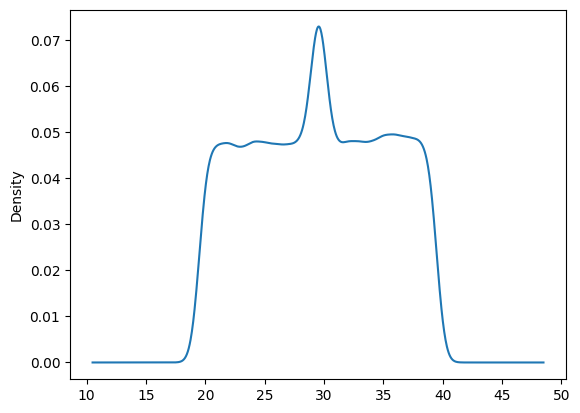

In [61]:
df["age"].plot(kind="kde")

<Axes: ylabel='Density'>

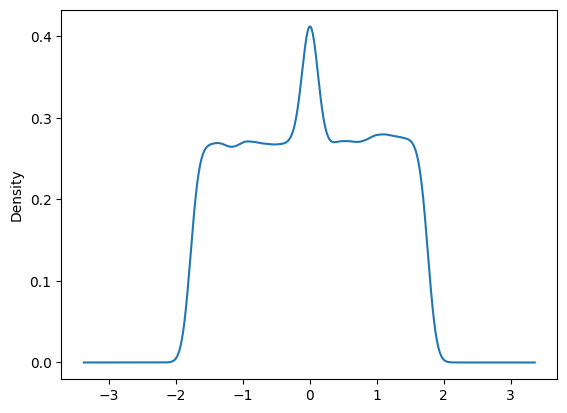

In [62]:
df["z_score"].plot(kind="kde")

In [63]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'outlier',
       'z_score'],
      dtype='str')

In [64]:
# Compute z-scores
df["z_score_time_taken"] = zscore(df["time_taken"])

# Flag outliers
df["outlier"] = df["z_score_time_taken"].abs() > 3

<Axes: ylabel='Density'>

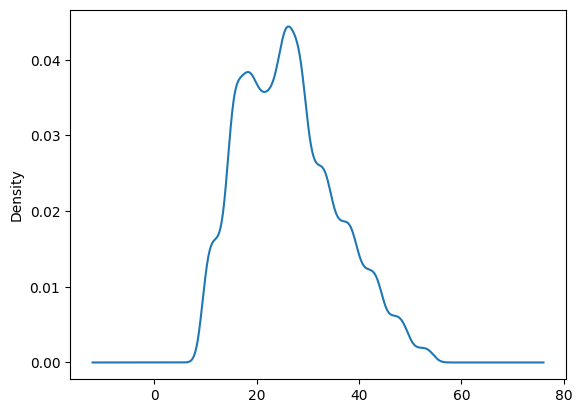

In [65]:
df["time_taken"].plot(kind="kde")

<Axes: ylabel='Density'>

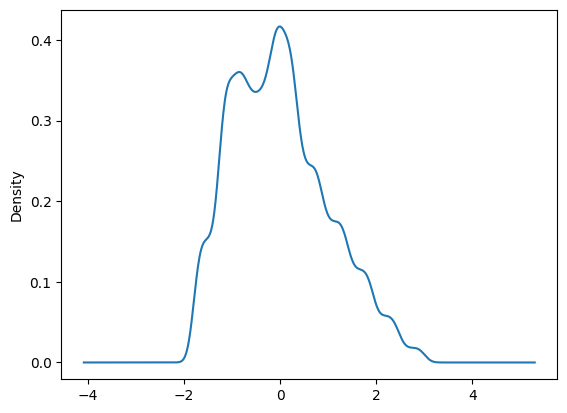

In [66]:
df["z_score_time_taken"].plot(kind='kde')

# IQR

<Axes: >

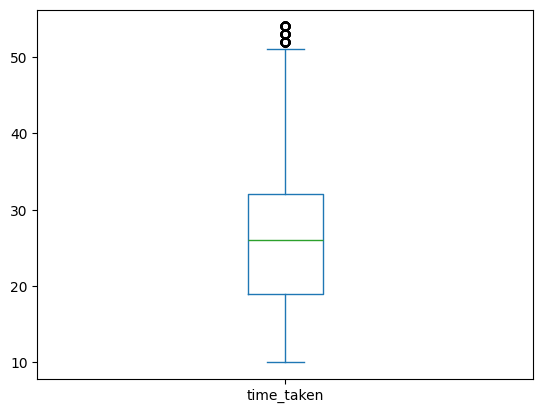

In [67]:
df["time_taken"].plot(kind="box")

In [68]:
q1=df["time_taken"].quantile(0.25)
q3=df["time_taken"].quantile(0.75)

In [69]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'outlier',
       'z_score', 'z_score_time_taken'],
      dtype='str')

In [70]:
df.drop(columns=["outlier","z_score","z_score_time_taken"],inplace=True)

q1

# outlier Handling

In [71]:
def skewness_report(
    df,
    num_cols=None,
    target_col="time_taken",
    mild=0.4,
    high=1.0
):
    if num_cols is None:
        num_cols = df.select_dtypes(include=np.number).columns

    # remove target column if present
    num_cols = [col for col in num_cols if col != target_col]

    skew_vals = df[num_cols].skew()

    report = []

    for col, skew in skew_vals.items():

        if abs(skew) <= mild:
            direction = "symmetric"
            severity = "none"
            transformer = "none / standard scaler"

        elif skew > mild and skew <= high:
            direction = "right"
            severity = "mild"
            transformer = "Yeo-Johnson"

        elif skew > high:
            direction = "right"
            severity = "high"
            transformer = "Log / Box-Cox"

        elif skew < -mild and skew >= -high:
            direction = "left"
            severity = "mild"
            transformer = "Yeo-Johnson"

        else:  # skew < -high
            direction = "left"
            severity = "high"
            transformer = "Reflect + Log OR Yeo-Johnson"

        report.append({
            "column": col,
            "skewness": round(skew, 3),
            "direction": direction,
            "severity": severity,
            "recommended_transformer": transformer
        })

    return pd.DataFrame(report).sort_values("skewness")
skew_report = skewness_report(df)
skew_report


,column,skewness,direction,severity,recommended_transformer
1,ratings,-1.853,left,high,Reflect + Log OR Yeo-Johnson
12,order_time_hour,-1.071,left,high,Reflect + Log OR Yeo-Johnson
0,age,-0.015,symmetric,none,none / standard scaler
9,order_month,-0.012,symmetric,none,none / standard scaler
11,pickup_time_minutes,0.004,symmetric,none,none / standard scaler
6,vehicle_condition,0.061,symmetric,none,none / standard scaler
2,restaurant_latitude,0.111,symmetric,none,none / standard scaler
4,delivery_latitude,0.112,symmetric,none,none / standard scaler
7,multiple_deliveries,0.299,symmetric,none,none / standard scaler
8,order_day,0.299,symmetric,none,none / standard scaler


In [73]:
def cap_and_transform_by_severity(
    df,
    skew_report,
    target_col="time_taken",
    iqr_factor=1.5,
    copy=True
):

    if copy:
        df = df.copy()

    transform_log = {}

    for _, row in skew_report.iterrows():
        col = row["column"]
        direction = row["direction"]
        severity = row["severity"]

        # ❌ skip target or missing columns
        if col == target_col or col not in df.columns:
            continue

        # ---------- NO ACTION ----------
        if severity == "none":
            transform_log[col] = "no capping | no transform"
            continue

        # ---------- IQR bounds ----------
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - iqr_factor * IQR
        upper = Q3 + iqr_factor * IQR

        # ---------- CAPPING ----------
        if direction == "right":
            df[col] = df[col].clip(upper=upper)

        elif direction == "left":
            df[col] = df[col].clip(lower=lower)

        else:  # symmetric
            df[col] = df[col].clip(lower, upper)

        # ---------- TRANSFORMATION ----------
        if severity == "mild":
            pt = PowerTransformer(method="yeo-johnson")
            df[[col]] = pt.fit_transform(df[[col]])
            transform_log[col] = "IQR cap + Yeo-Johnson"

        elif severity == "high":

            if direction == "right":
                df[col] = np.log1p(df[col])
                transform_log[col] = "Upper IQR cap + Log1p"

            elif direction == "left":
                reflected = df[col].max() + 1 - df[col]
                df[col] = np.log1p(reflected)
                transform_log[col] = "Lower IQR cap + Reflect+Log1p"

            else:
                pt = PowerTransformer(method="yeo-johnson")
                df[[col]] = pt.fit_transform(df[[col]])
                transform_log[col] = "IQR cap + Yeo-Johnson"

    return df, pd.Series(transform_log, name="applied_preprocessing")


In [74]:
df_processed, preprocessing_summary = cap_and_transform_by_severity(
    df,
    skew_report
)

preprocessing_summary


ratings                 Lower IQR cap + Reflect+Log1p
order_time_hour         Lower IQR cap + Reflect+Log1p
age                         no capping | no transform
order_month                 no capping | no transform
pickup_time_minutes         no capping | no transform
vehicle_condition           no capping | no transform
restaurant_latitude         no capping | no transform
delivery_latitude           no capping | no transform
multiple_deliveries         no capping | no transform
order_day                   no capping | no transform
distance                    no capping | no transform
is_weekend                      Upper IQR cap + Log1p
restaurant_longitude            Upper IQR cap + Log1p
delivery_longitude              Upper IQR cap + Log1p
Name: applied_preprocessing, dtype: str

In [75]:
# def cap_and_transform_by_severity(
#     df,
#     skew_report,
#     iqr_factor=1.5,
#     copy=True
# ):

#     if copy:
#         df = df.copy()

#     transform_log = {}

#     for _, row in skew_report.iterrows():
#         col = row["column"]
#         direction = row["direction"]
#         severity = row["severity"]

#         if col not in df.columns:
#             continue

#         # ---------- NO ACTION ----------
#         if severity == "none":
#             transform_log[col] = "no capping | no transform"
#             continue

#         # ---------- IQR bounds ----------
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower = Q1 - iqr_factor * IQR
#         upper = Q3 + iqr_factor * IQR

#         # ---------- CAPPING ----------
#         if direction == "right":
#             df[col] = df[col].clip(upper=upper)

#         elif direction == "left":
#             df[col] = df[col].clip(lower=lower)

#         else:  # symmetric (rare mild case)
#             df[col] = df[col].clip(lower, upper)

#         # ---------- TRANSFORMATION ----------
#         if severity == "mild":
#             pt = PowerTransformer(method="yeo-johnson")
#             df[[col]] = pt.fit_transform(df[[col]])
#             transform_log[col] = "IQR cap + Yeo-Johnson"

#         elif severity == "high":

#             if direction == "right":
#                 df[col] = np.log1p(df[col])
#                 transform_log[col] = "Upper IQR cap + Log1p"

#             elif direction == "left":
#                 reflected = df[col].max() + 1 - df[col]
#                 df[col] = np.log1p(reflected)
#                 transform_log[col] = "Lower IQR cap + Reflect+Log1p"

#             else:
#                 pt = PowerTransformer(method="yeo-johnson")
#                 df[[col]] = pt.fit_transform(df[[col]])
#                 transform_log[col] = "IQR cap + Yeo-Johnson"

#     return df, pd.Series(transform_log, name="applied_preprocessing")

# df_processed, preprocessing_summary = cap_and_transform_by_severity(
#     df,
#     skew_report
# )

# preprocessing_summary



In [76]:
df_processed.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,0.741937,22.745049,4.342408,22.765049,4.342668,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,0.693147,15.0,2.639057,morning,3.025149
1,BANGRES18DEL02,34.0,0.916291,12.913041,4.365430,13.043041,4.367081,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0.000000,5.0,1.791759,evening,20.183530
2,BANGRES19DEL01,23.0,0.955511,12.914264,4.365369,12.924264,4.365496,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,0.693147,15.0,2.833213,morning,1.552758
3,COIMBRES13DEL02,38.0,0.832909,11.003669,4.356407,11.053669,4.357048,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0.000000,10.0,1.945910,evening,7.790401
4,CHENRES12DEL01,32.0,0.875469,12.972793,4.397531,13.012793,4.398023,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,0.693147,15.0,2.484907,afternoon,6.210138


In [77]:
df_processed.to_csv(r"D:\Swiggy_Time_prediction\Data\outlier_removed.csv")